# Problem Statement:- In this PFA housing dataset we have many independent or predictor variables with the help of these variables we have to find the target variable which is SalesPrice of houses in a city of Australia.This is the problem of Regression algorithm.

In [99]:
#Importing important packages and libraries of python.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [100]:
#Loading both training and test dataset
df_train=pd.read_csv("housing_train.csv")
df_test=pd.read_csv("housing_test.csv")

In [101]:
#Looking at the training dataset.
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4         

Our training dataset have :- 1168 rows and 81 columns

In [102]:
#Looking at the test dataset.
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

Our test dataset have :- 292 rows and 80 columns

In [103]:
#Checking the names of all training dataset column.
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [104]:
#checking the information about training dataset columns.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

We can see many columns of our dataset contain lots of null values,columns which have many null values approximately equal to 50% we will remove those columns from the both training and test dataset.

In [105]:
#Deleting those columns which have many null values in them from train and test dataset.
df_train=df_train.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)
df_test=df_test.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)


In [106]:
#checking the shape of the training dataset.
df_train.shape

(1168, 76)

In [107]:
#checking the shape of the test dataset.
df_test.shape

(292, 75)

In [108]:
#Checking the information of each column of the training datasets.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [109]:
#Checking the information of each column in test dataset.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   LotShape       292 non-null    object 
 7   LandContour    292 non-null    object 
 8   Utilities      292 non-null    object 
 9   LotConfig      292 non-null    object 
 10  LandSlope      292 non-null    object 
 11  Neighborhood   292 non-null    object 
 12  Condition1     292 non-null    object 
 13  Condition2     292 non-null    object 
 14  BldgType       292 non-null    object 
 15  HouseStyle     292 non-null    object 
 16  OverallQual    292 non-null    int64  
 17  OverallCond    292 non-null    int64  
 18  YearBuilt 

In [110]:
#Lets see all the columns in the dataset.
pd.set_option('max_columns', None)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

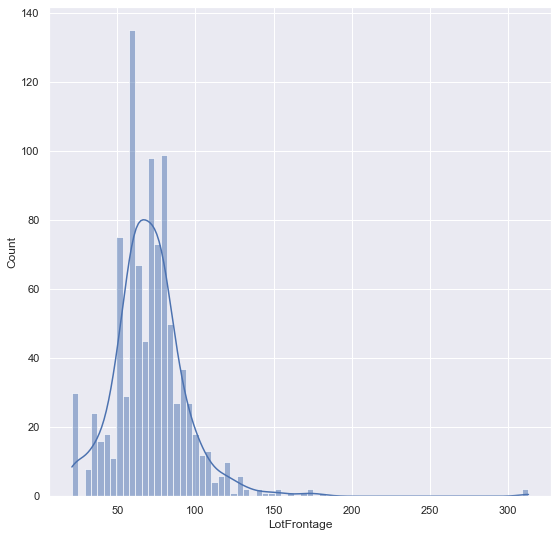

In [111]:
#Let us draw the normal distribution curve for the "LotFrontage" Column.
sns.histplot(data=df_train, x="LotFrontage", kde=True)

We can clearly see that LotFrontage is heavily skewed to the righthand side.

<AxesSubplot:xlabel='MasVnrArea', ylabel='Count'>

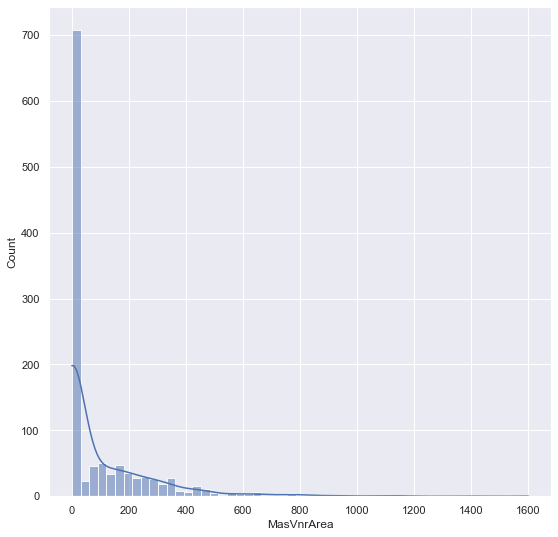

In [112]:
#Lets draw the normal distribution curve for the  column "MasVnrArea".
sns.histplot(data=df_train, x="MasVnrArea", kde=True)

MasVnrArea also heavily skewed to the right hand side.

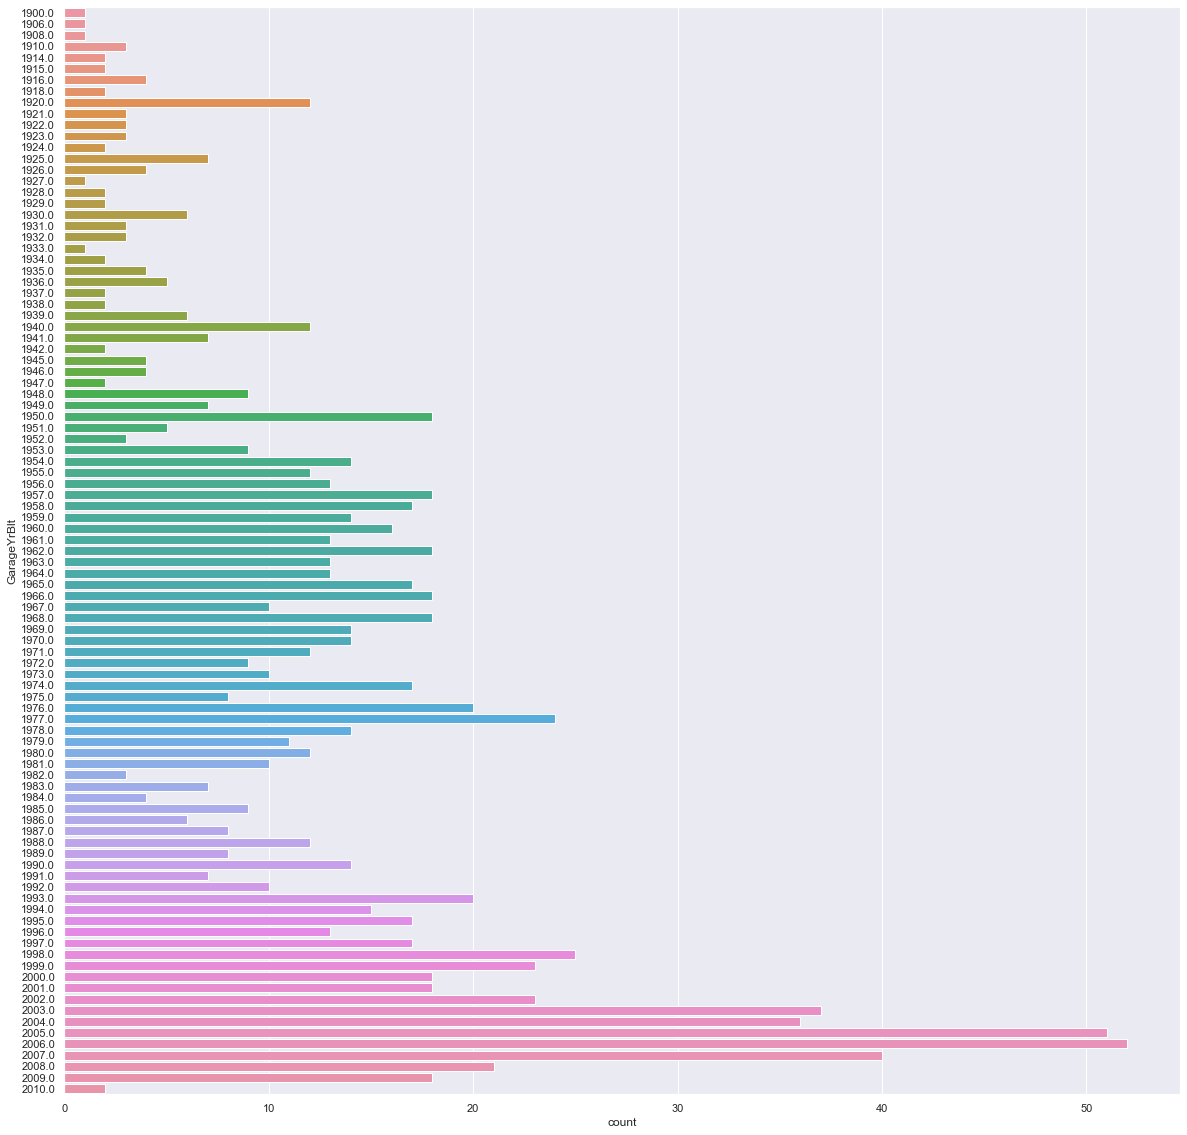

In [113]:
#Let us see the Countplot of the column "GarageYrBlt".
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="GarageYrBlt", data=df_train)

From the Countplot of the "GarageYrBlt" we can conclude that:
    
    >From 1900 to 1950 :- Very less number of garages built every year.
    >From 1951 to 1981 :- Increment in the average number of garages built every year.
    >From 1982 to 2010 :- Drastic increment in the average number of the garages built every year.
        
        Most number of garages are builted in year 2005 & 2006.

In [114]:
#Creating an empty list obj ,in which we will add all the columns which have object datatype.
obj = []
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        obj.append(i)

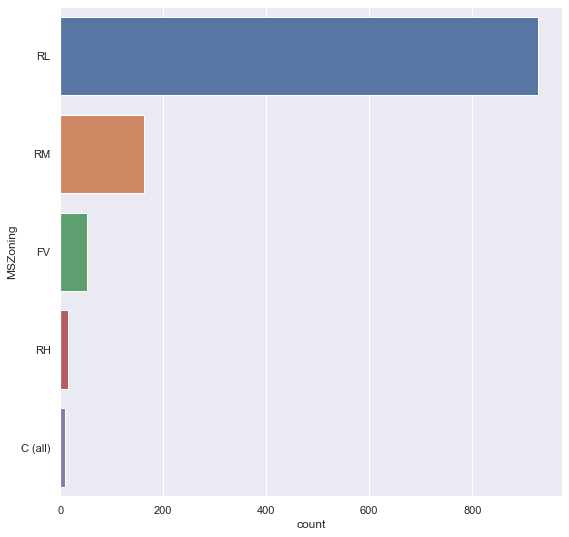

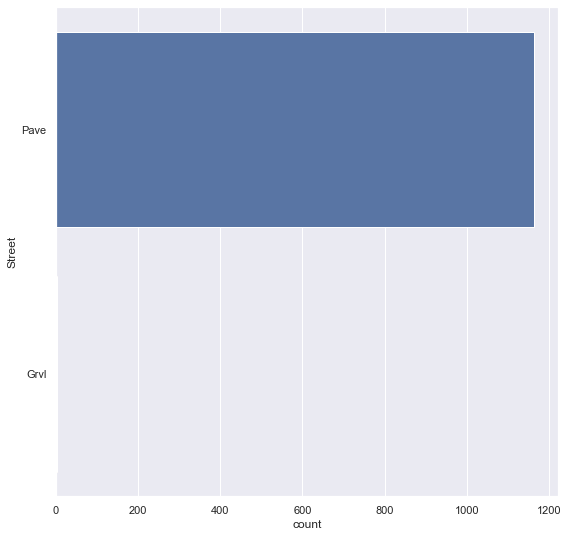

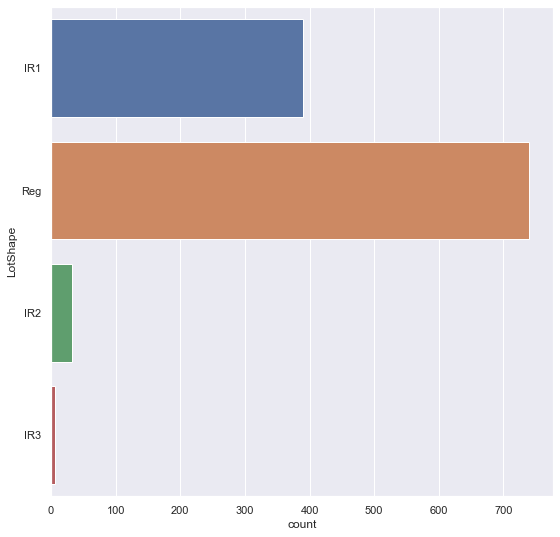

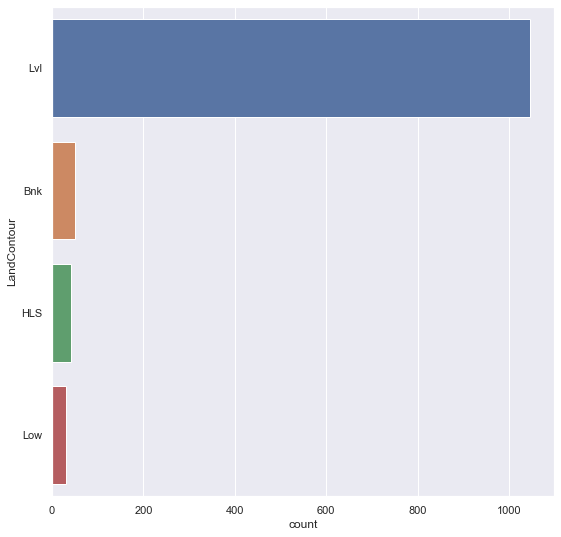

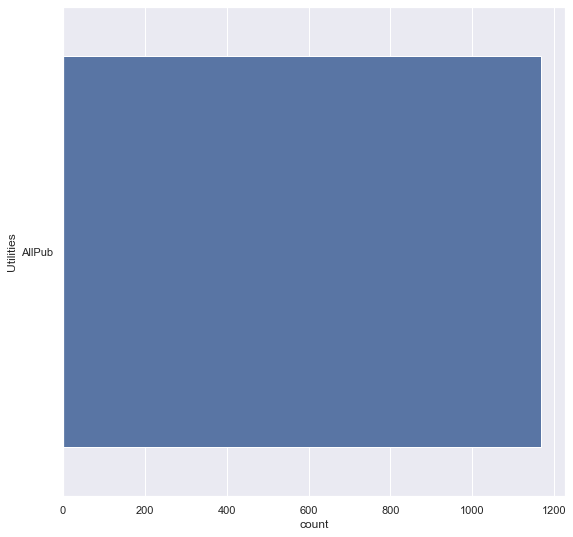

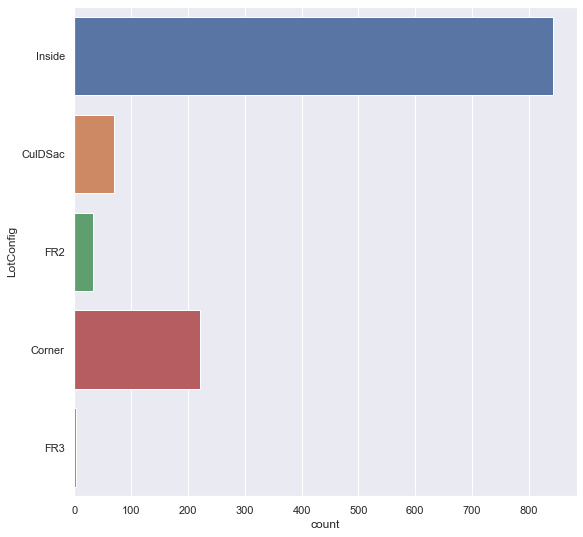

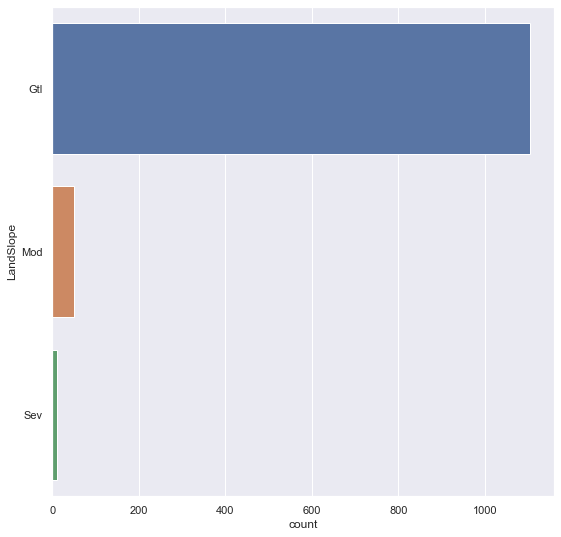

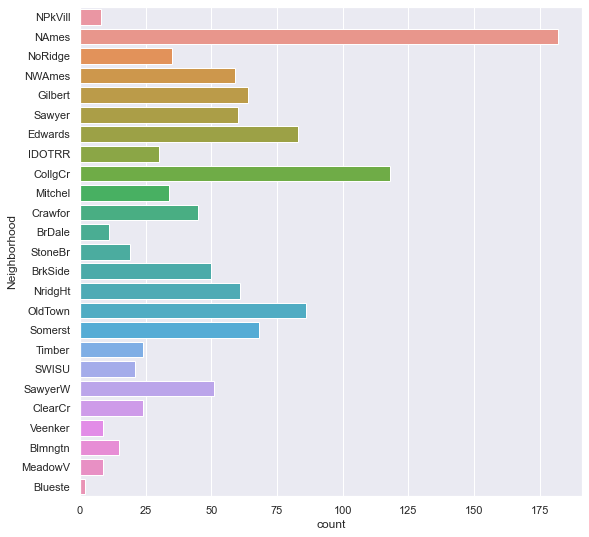

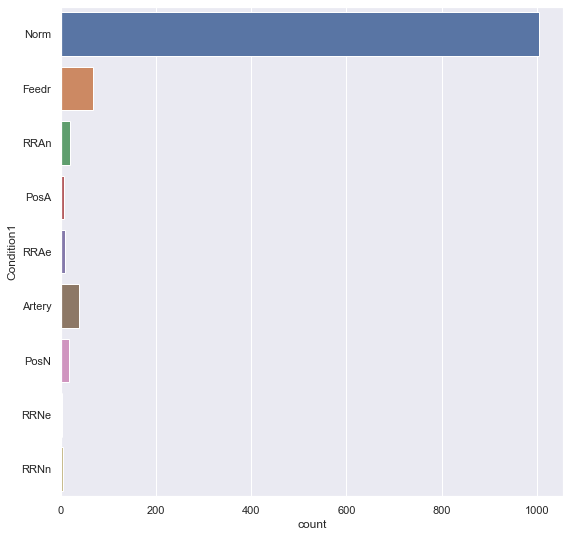

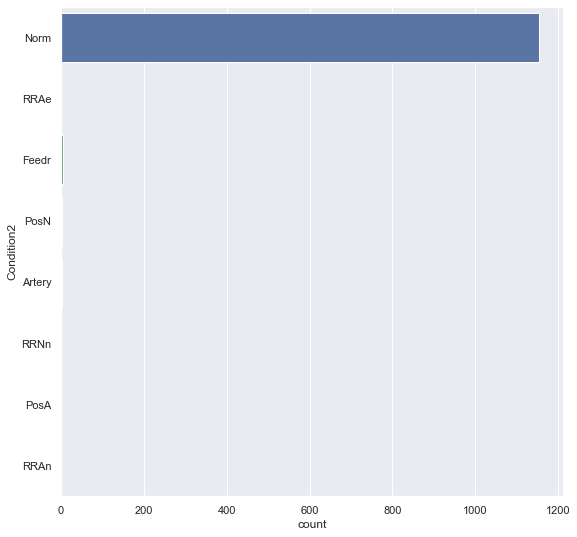

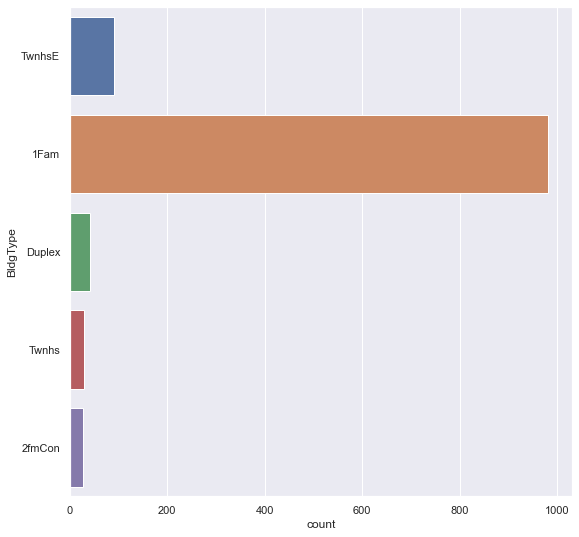

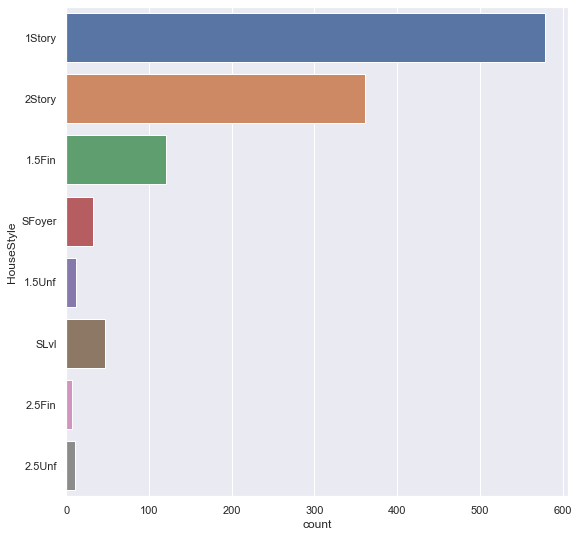

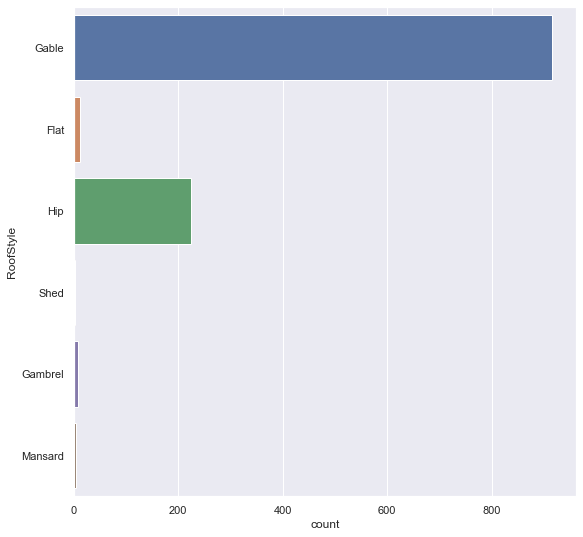

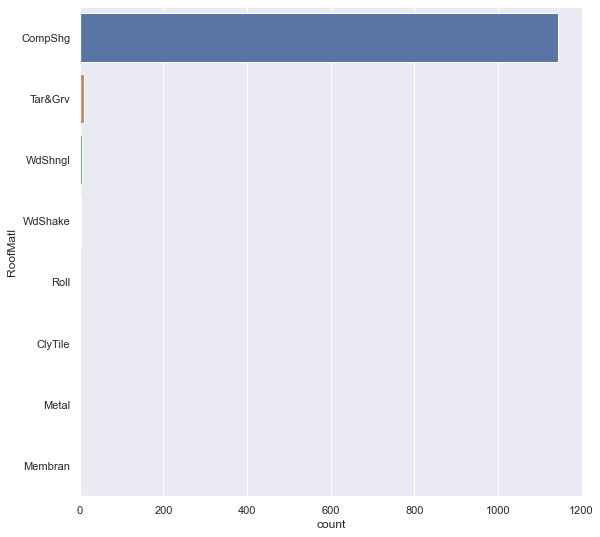

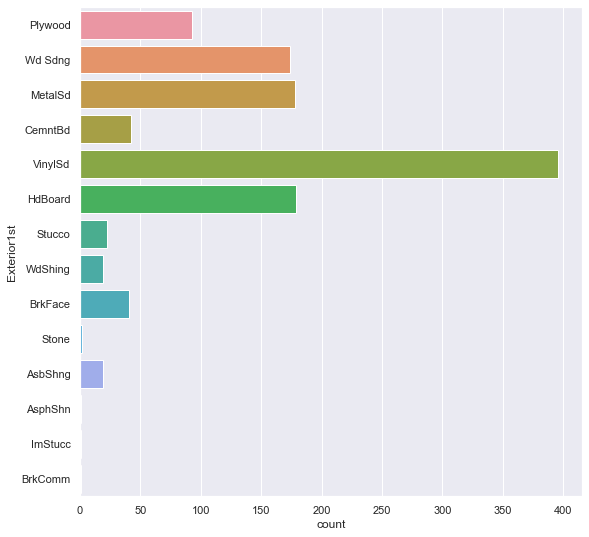

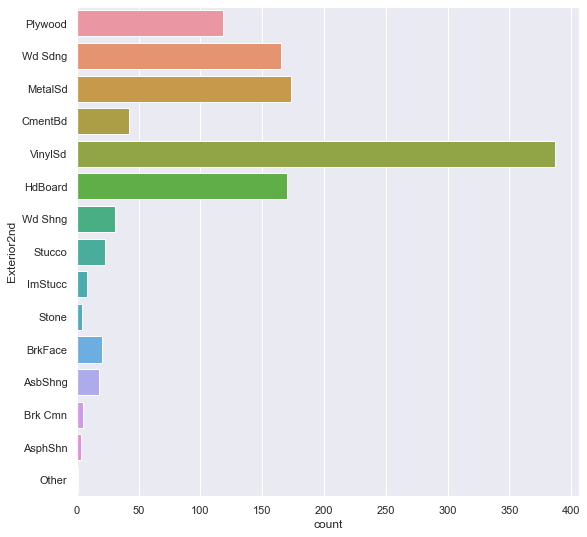

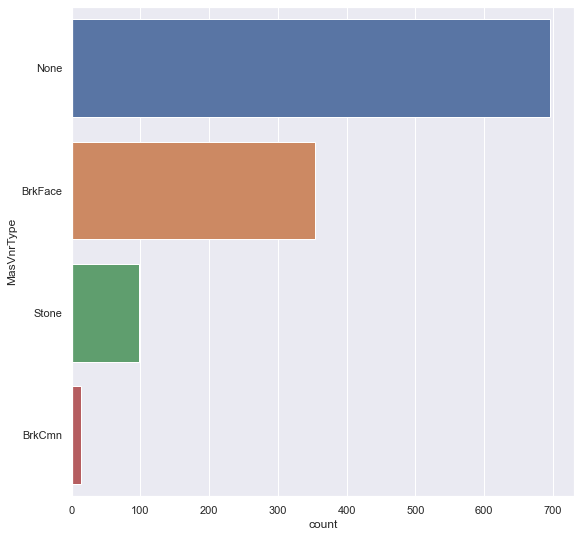

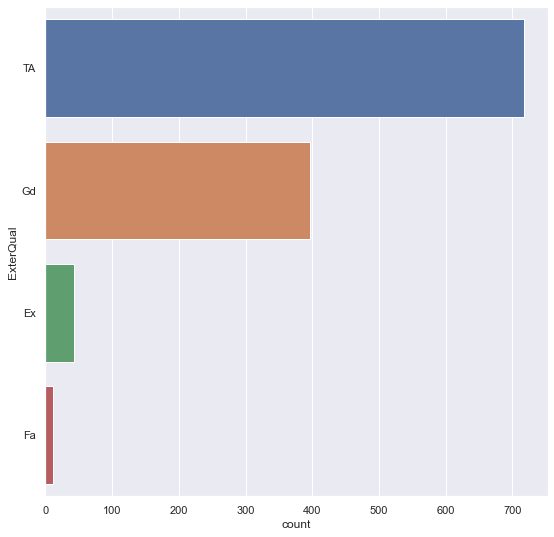

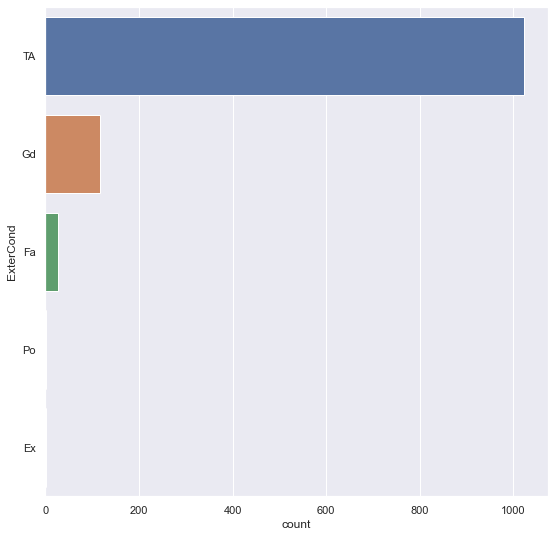

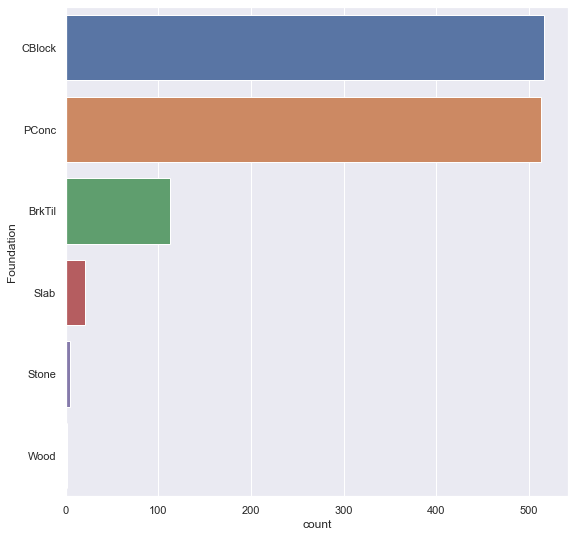

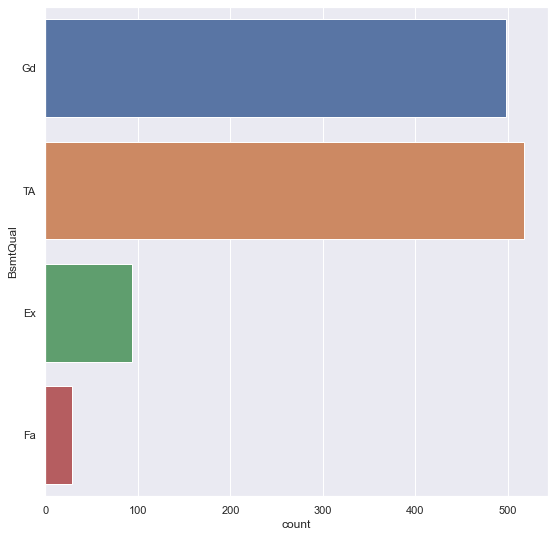

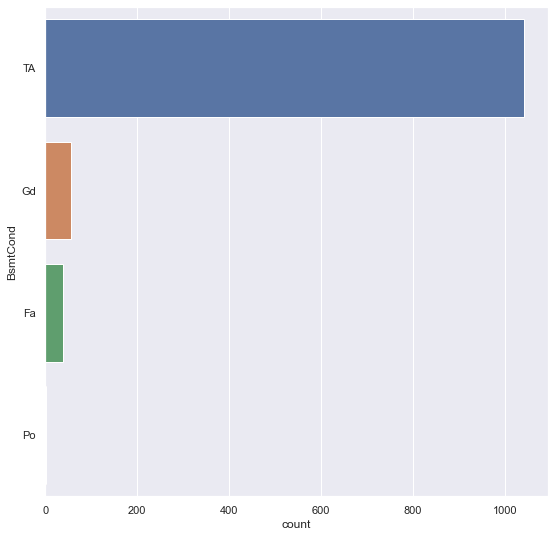

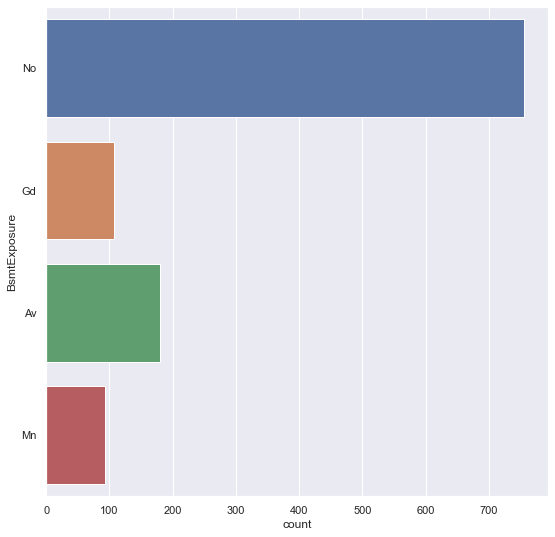

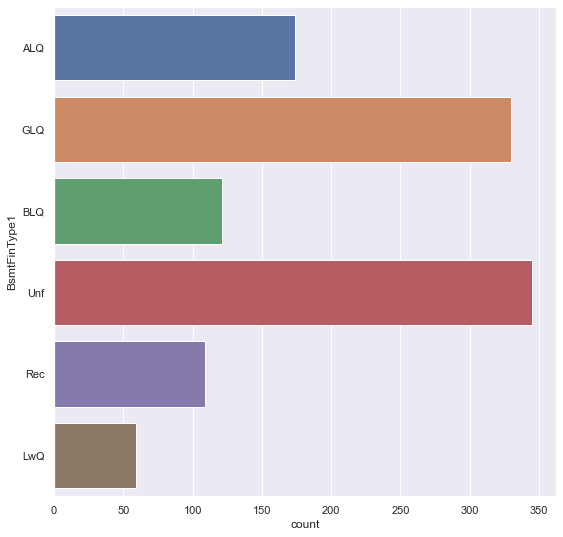

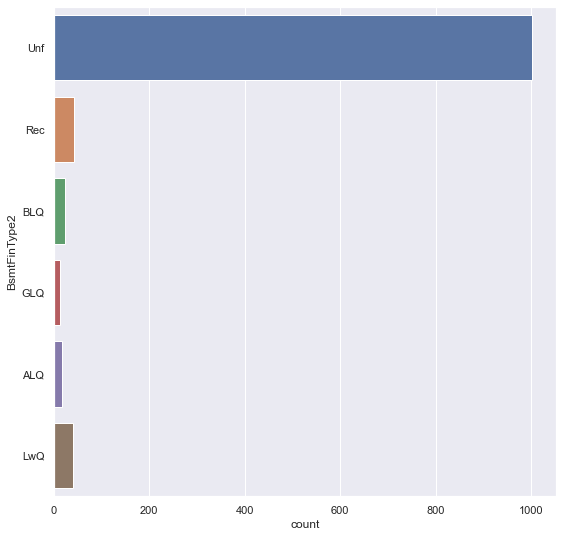

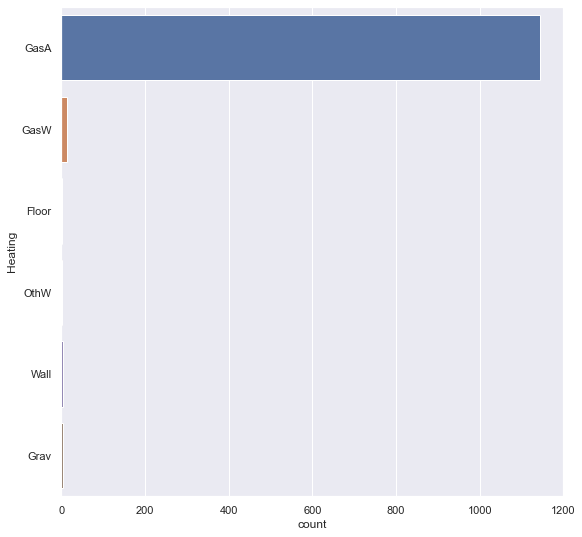

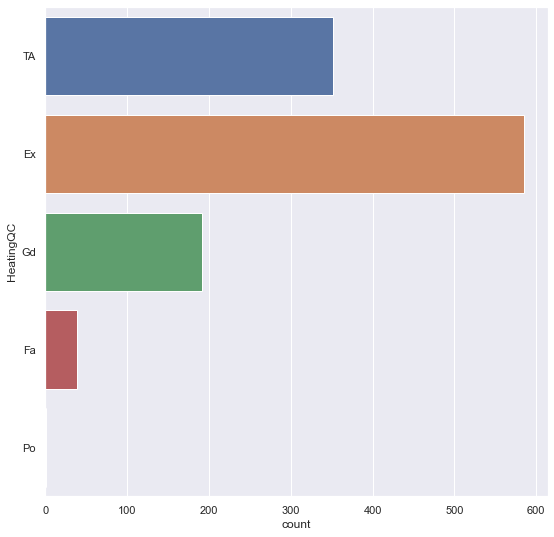

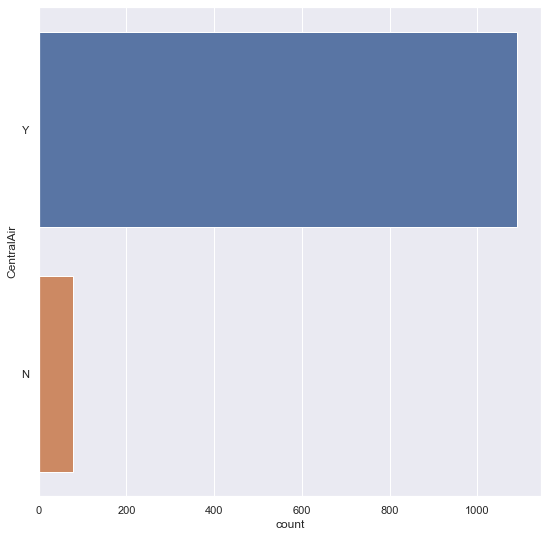

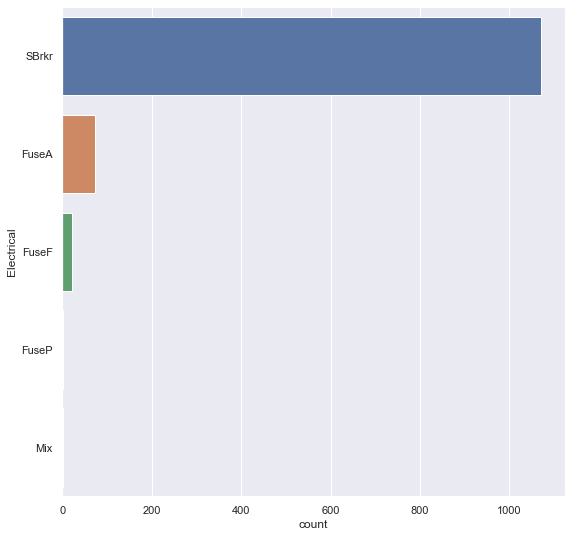

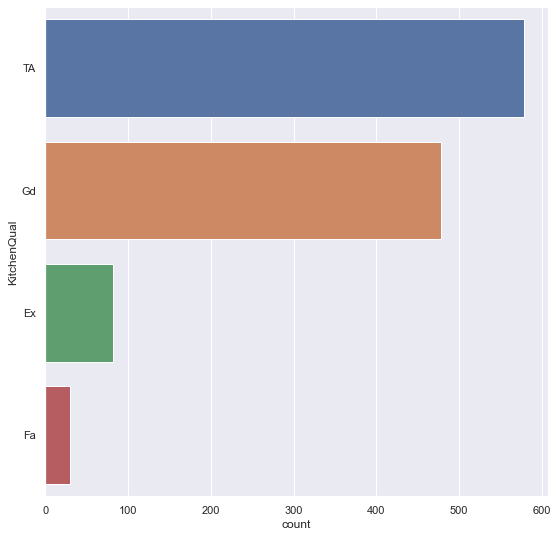

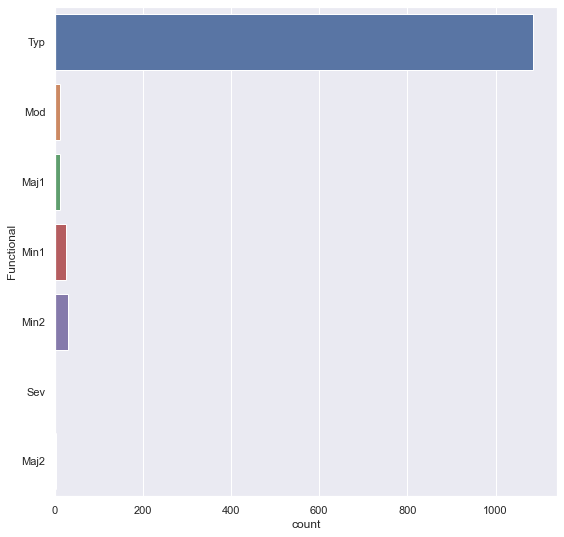

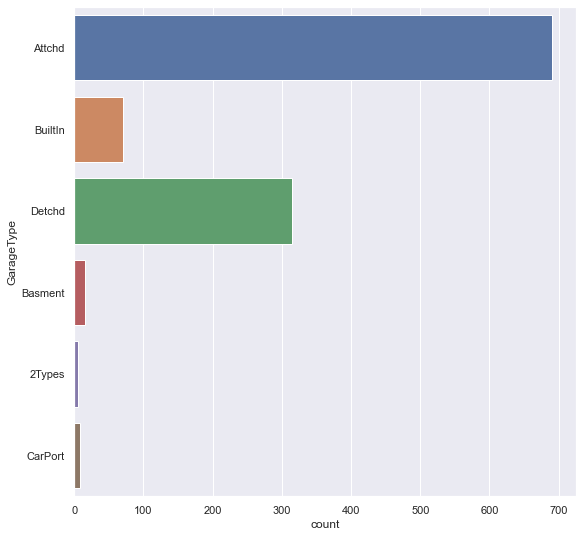

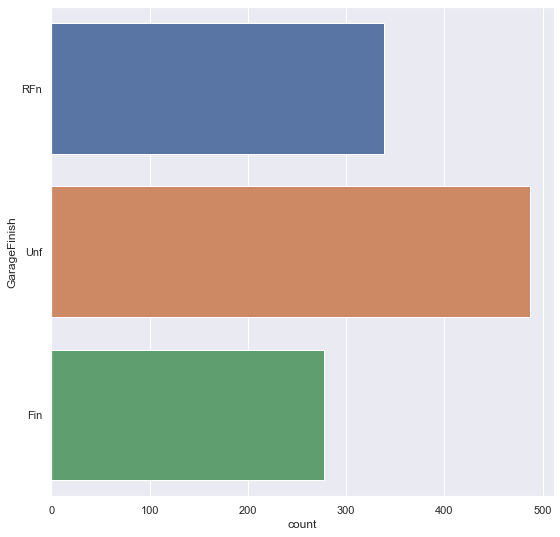

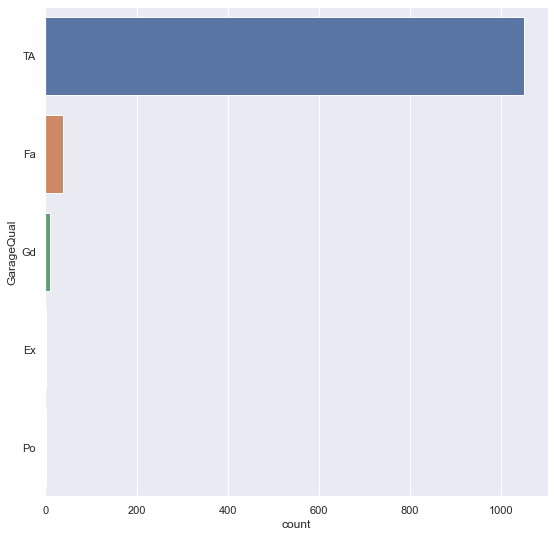

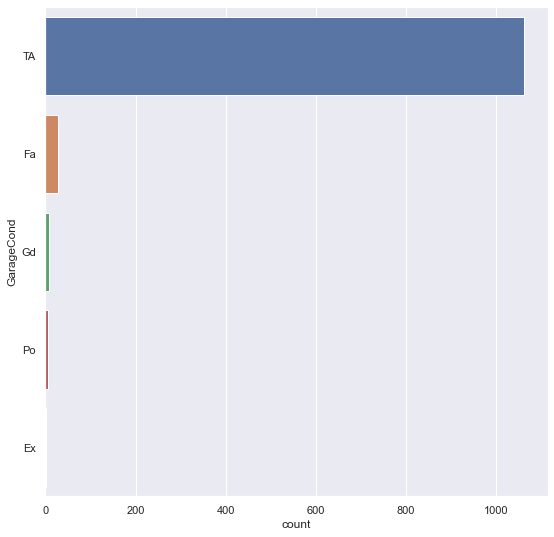

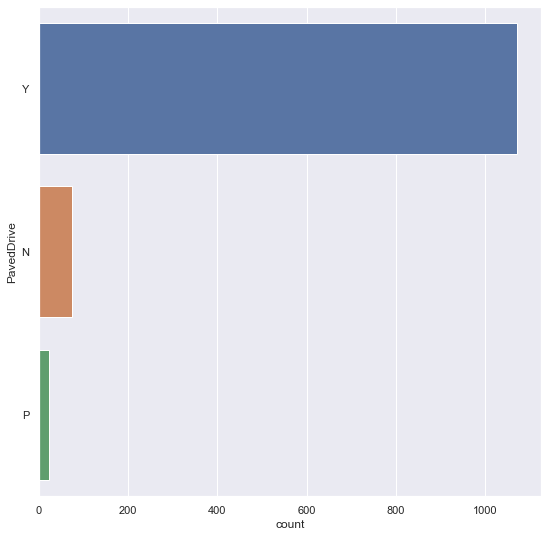

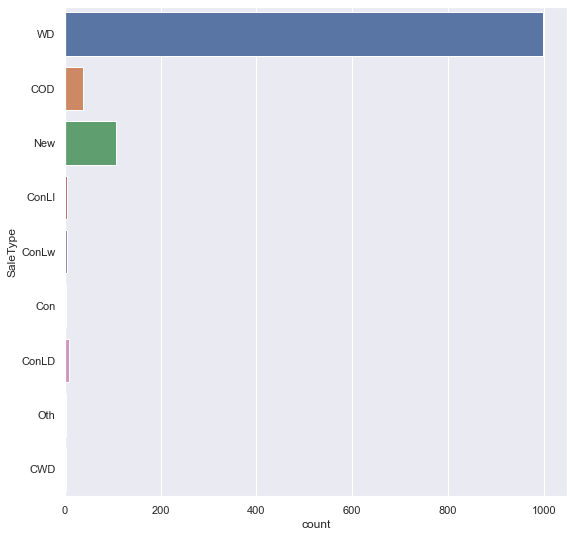

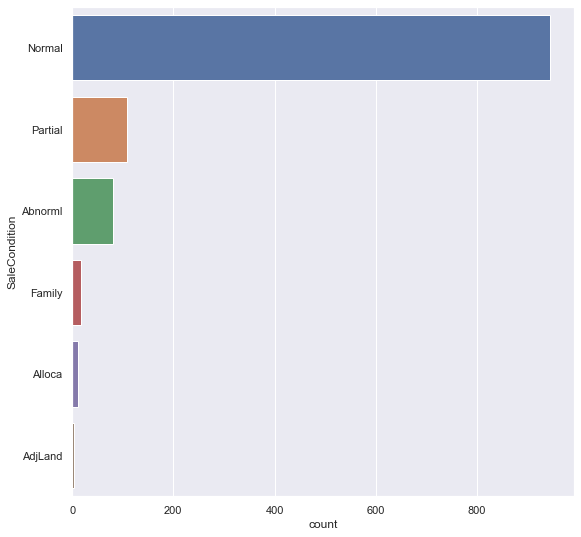

In [115]:
# Creating countplot of  all categorical columns  which we have added in obj list.
sns.set(rc={'figure.figsize':(9,9)})
for i in obj:
    sns.countplot(y = i ,data=df_train)
    plt.show()

# >MSZoning: Identifies the general zoning classification of the sale.

   #Most of houses in our dataset are in the following two zones
   
    1.RL	Residential Low Density
    
    2.RM	Residential Medium Density
    
# >Street: Type of road access to property

   #Almost all of the houses are connected with Paved road.
   
# >LotShape: General shape of property

   #Most of the houses in our dataset have following shape of property.
   
   1.Reg	Regular	
   
   2.IR1	Slightly irregular
   
# >LandContour: Flatness of the property

  #Most of the houses in our dataset have following flatness
  
   1.Lvl	Near Flat/Level	
   
   2.Bnk	Banked - Quick and significant rise from street grade to building
   
# >LotConfig: Lot configuration
  
  #Most of the houses in our dataset have the following lot configuration
  
  1.Inside	Inside lot
  
  2.Corner	Corner lot
  
  
# >LandSlope: Slope of property

   #Most of the properties in our dataset have following slopes.
   
   1.Gtl	Gentle slope
   
   2.Mod	Moderate Slope
   
# >Neighborhood: Physical locations within Ames city limits

   #Most of the properties have following neighbourhood in the city.
   
   1.Names	    North Ames
   
   2.CollgCr	College Creek
   
   3.OldTown	Old Town
   
# >Condition1: Proximity to various conditions

   #Most of the houses have following proximity.
   
   1.Norm	Normal
   
   2.Feedr	Adjacent to feeder street
   
   3.Artery	Adjacent to arterial street
   
   
# >BldgType: Type of dwelling

   #Most of the houses have following building type.
   
		1. 1Fam	    Single-family Detached	
        
        2. TwnhsE	Townhouse End Unit
        
        
# >HouseStyle: Style of dwelling

   #Most of the houses have following housestyle type.
   
	   1.1Story	One story
       
       2.2Story	Two story
       
       3.1.5Fin	One and one-half story: 2nd level finished
       
# >RoofStyle: Type of roof

   #Most of the properties in our dataset have following roofstyles
   
       1.Gable	Gable
       
       2.Hip	Hip
       
       3.Flat	Flat
       
# >MasVnrType: Masonry veneer type

   #Most of the properties in our dataset have following masonary type
   
       1.None	    None
       
       2.BrkFace	Brick Face
       
       3.Stone	    Stone
       
       4. BrkCmn	Brick Common
       
# >ExterQual: Evaluates the quality of the material on the exterior 

   #Most of the properties in our dataset have following ExterQual
      
		  1.TA	Average/Typical
          
          2.Gd	Good
          
          3.Ex	Excellent
       
       
      
      
       
       
       
  

   


In [116]:
#We are creating an empty list numer in which we are adding all the numerical column datatype.
numer = []
for i in df_train.columns:
    if df_train[i].dtypes == 'int64' or  df_train[i].dtypes == 'float64' :
        numer.append(i)

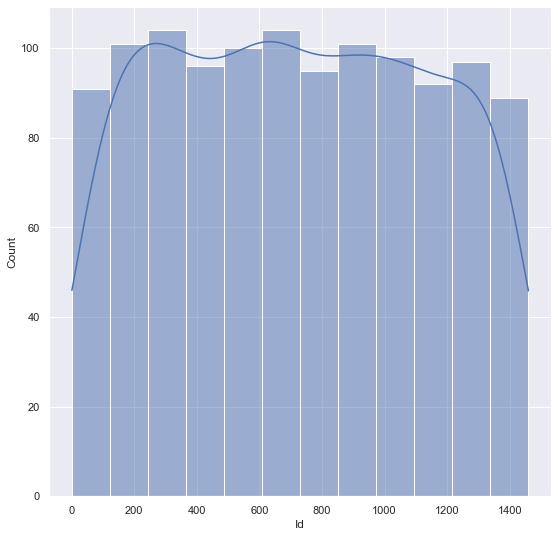

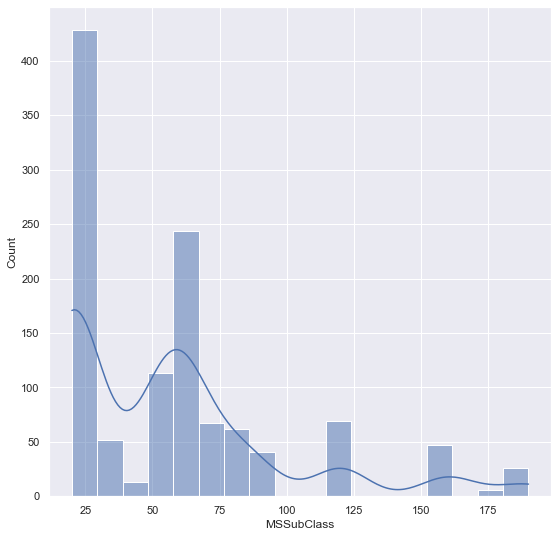

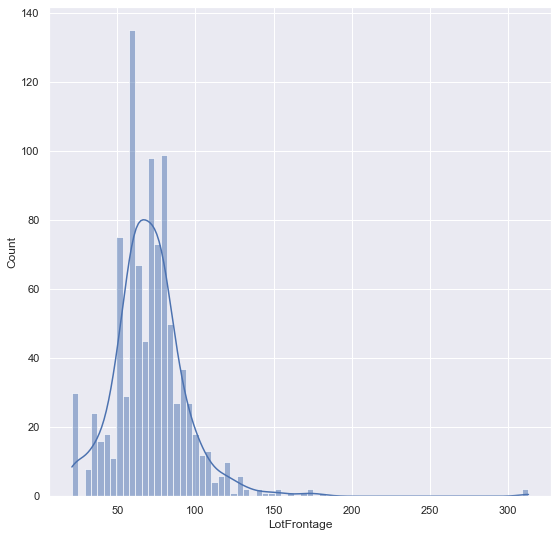

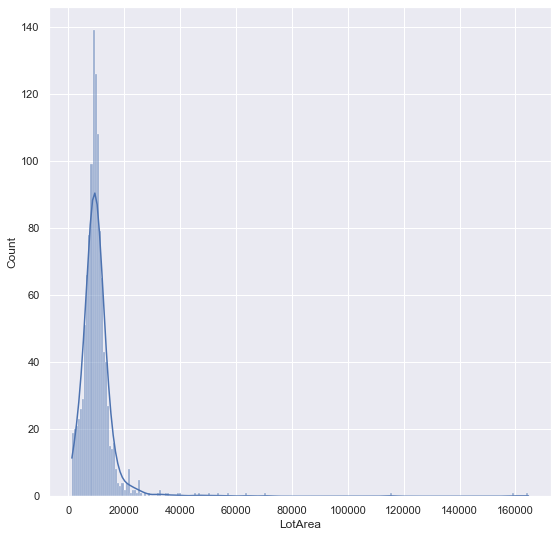

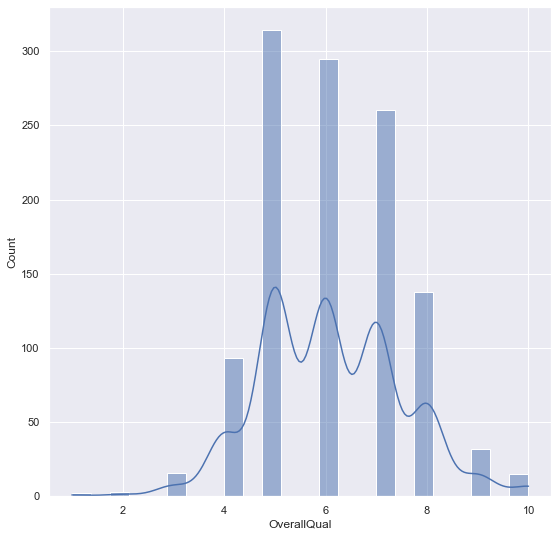

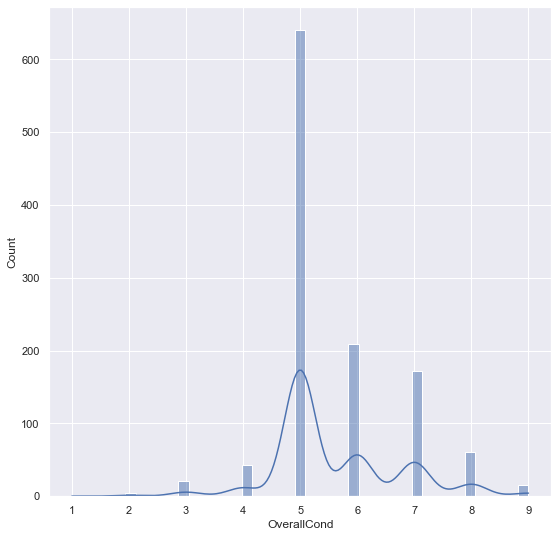

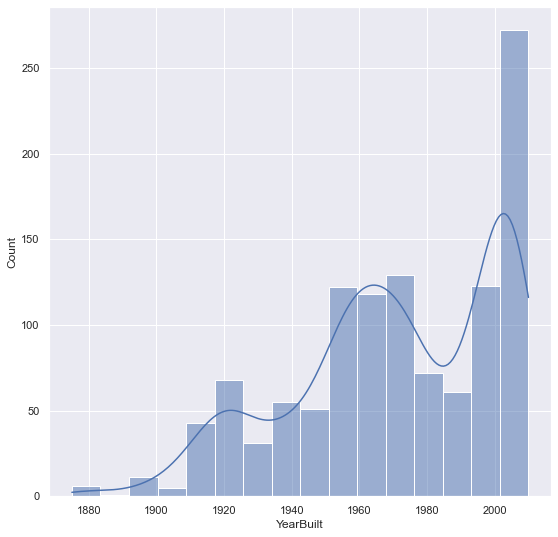

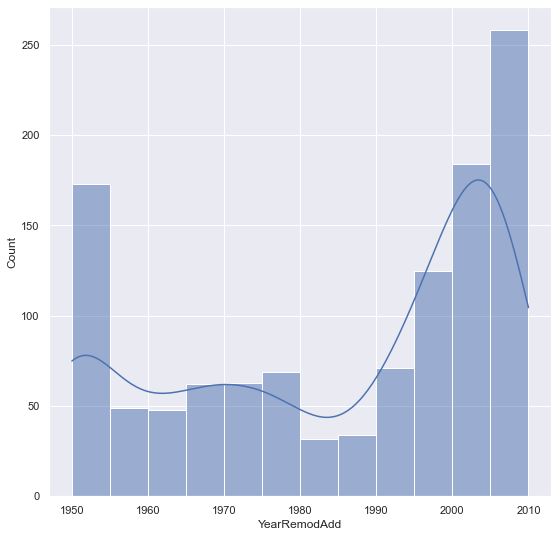

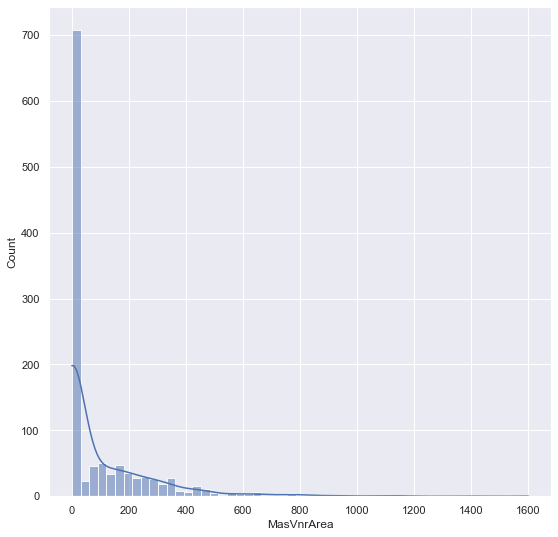

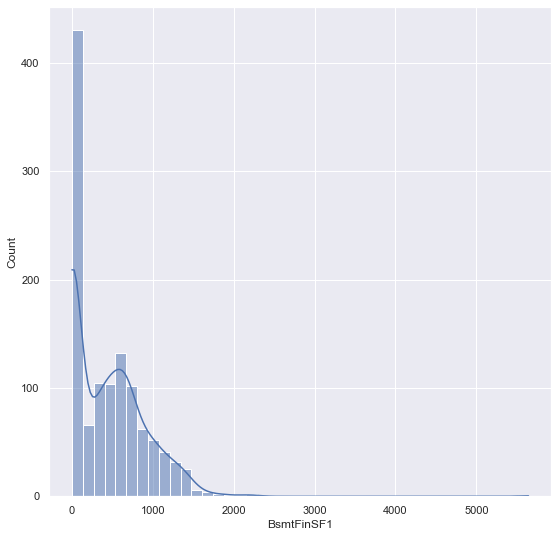

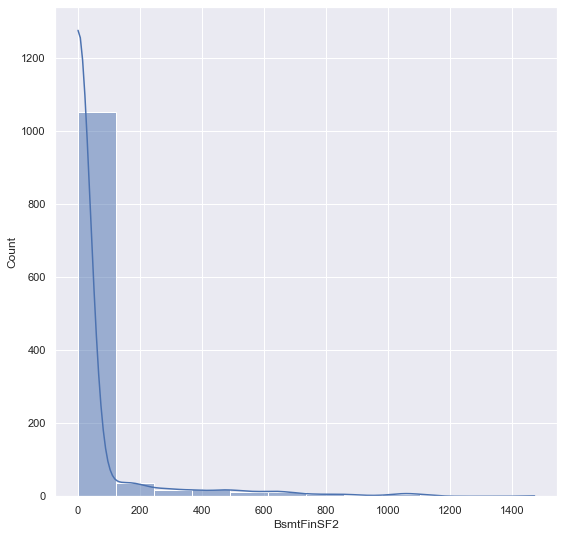

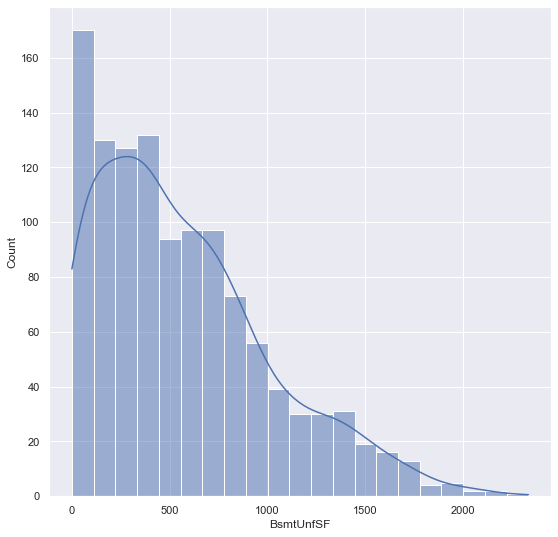

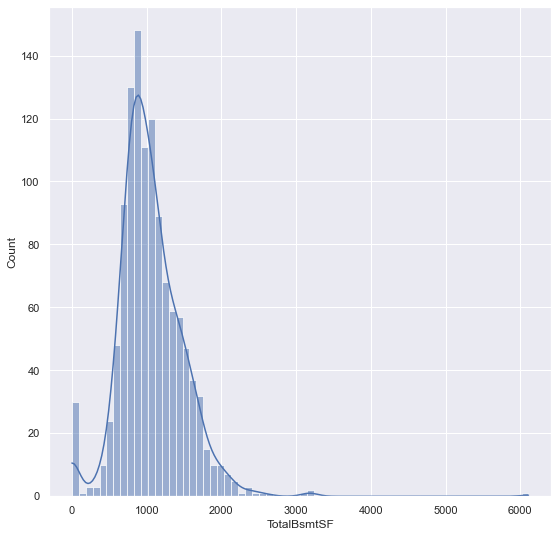

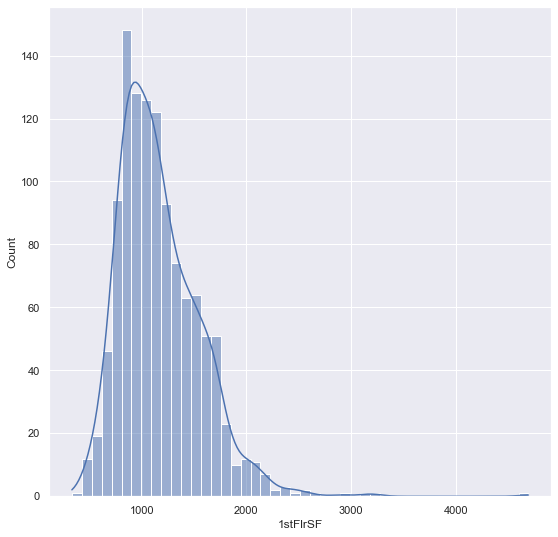

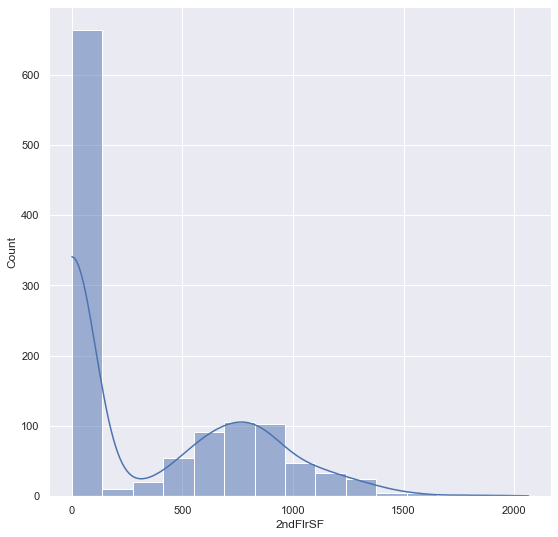

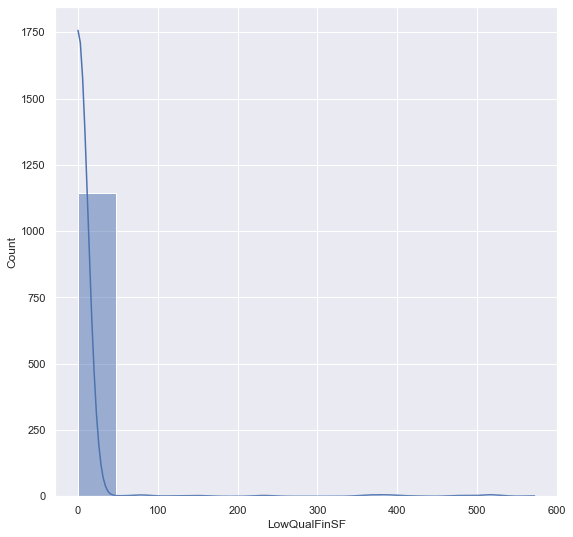

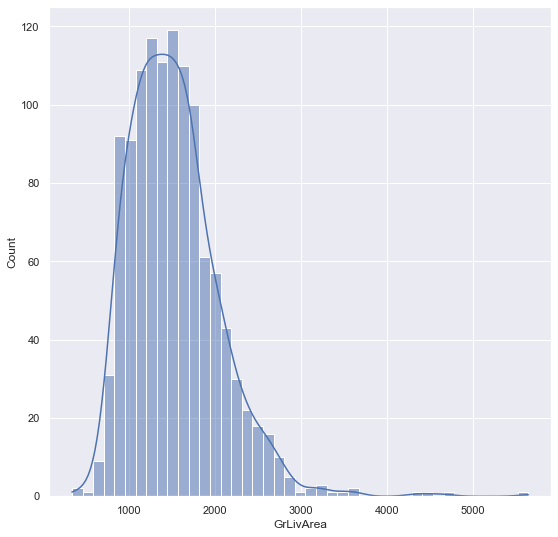

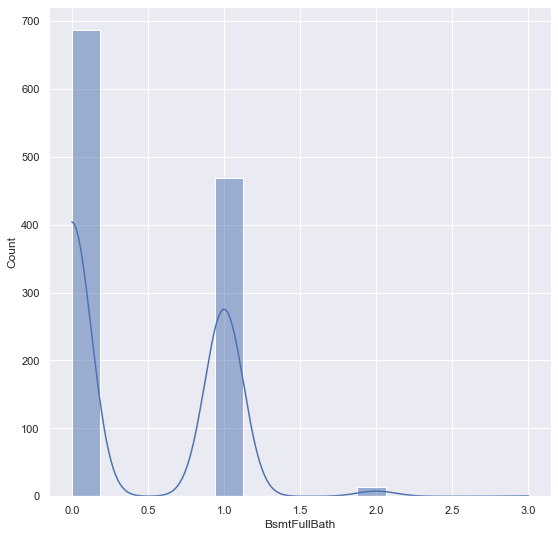

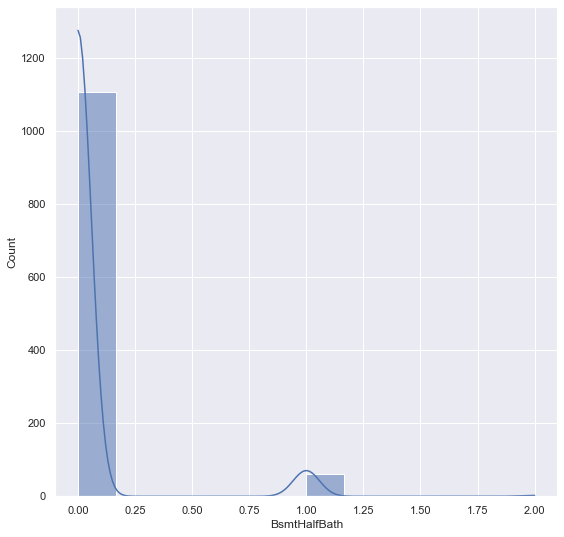

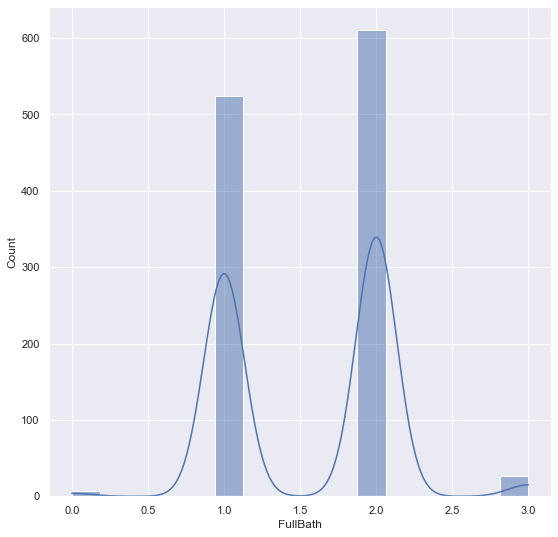

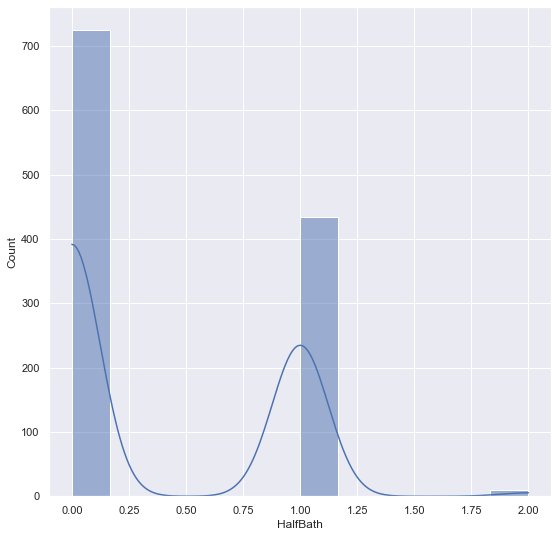

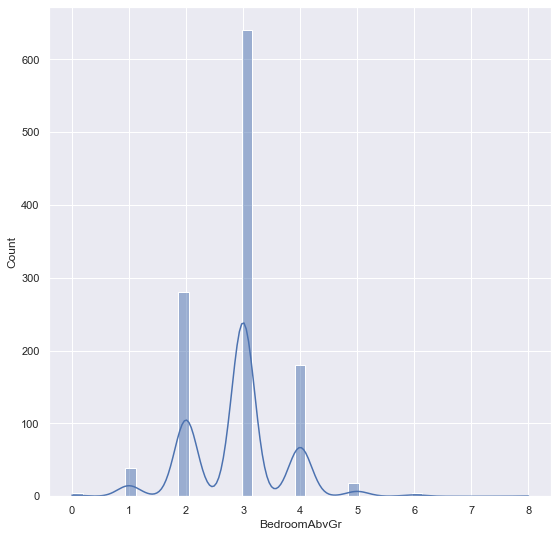

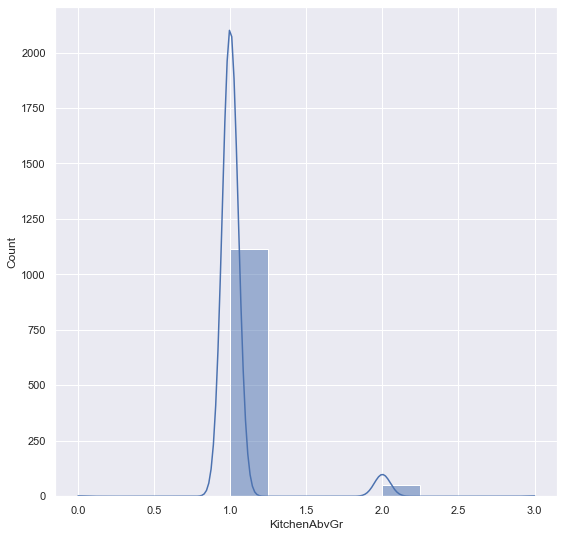

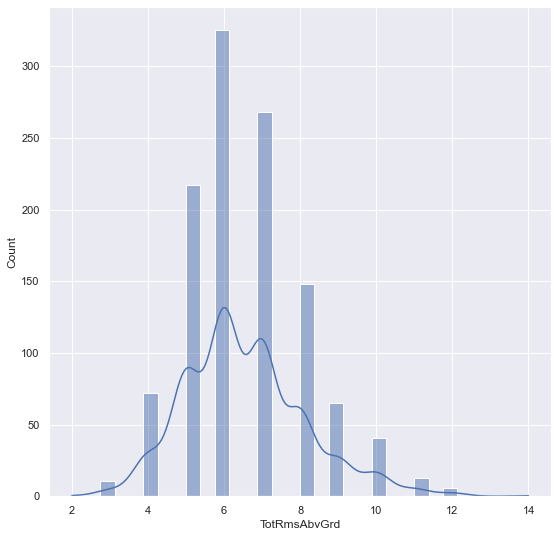

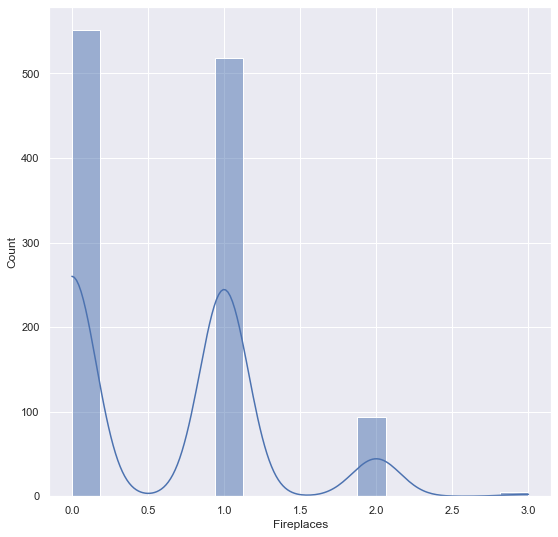

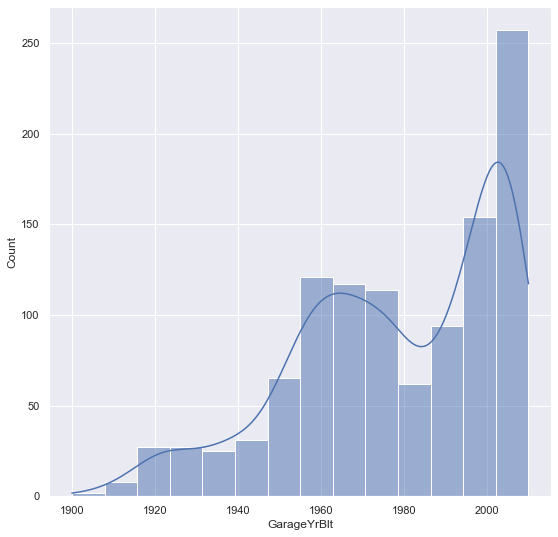

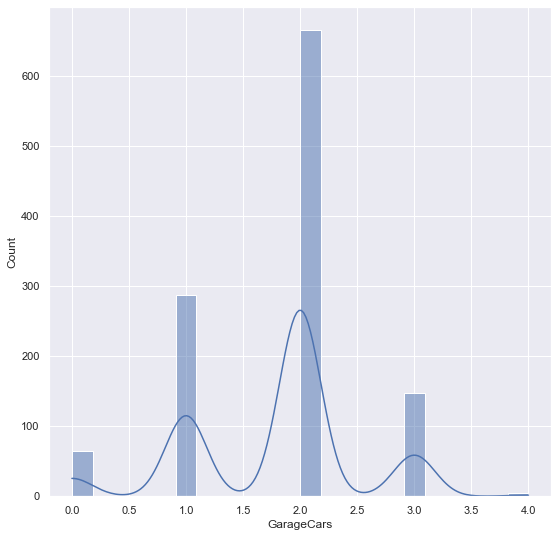

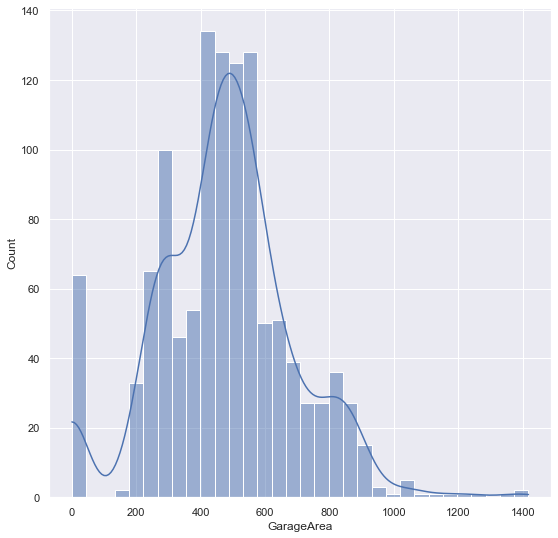

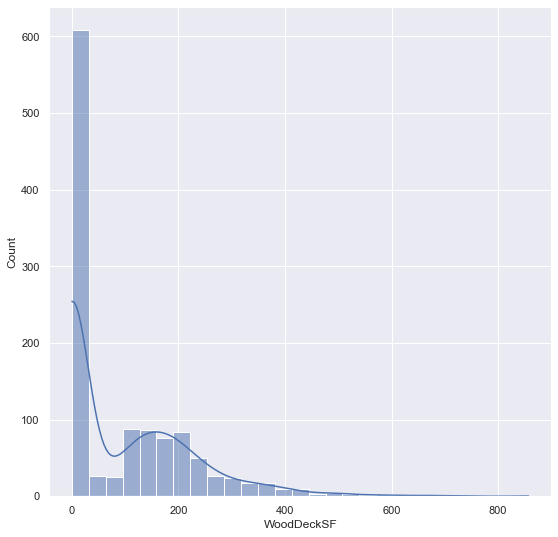

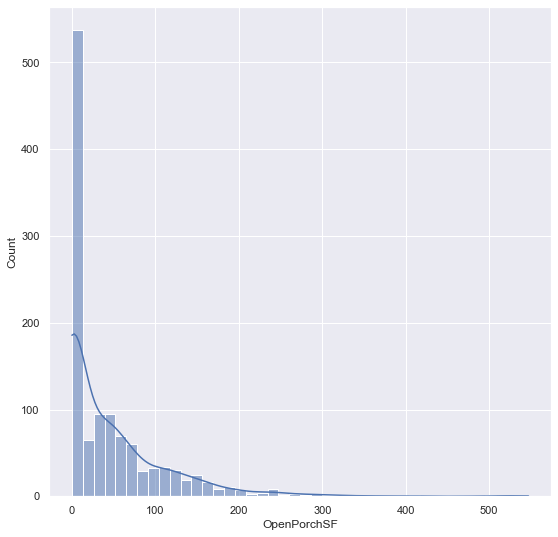

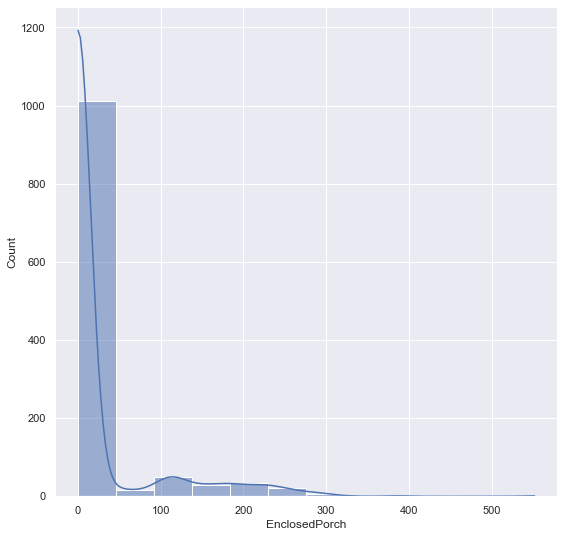

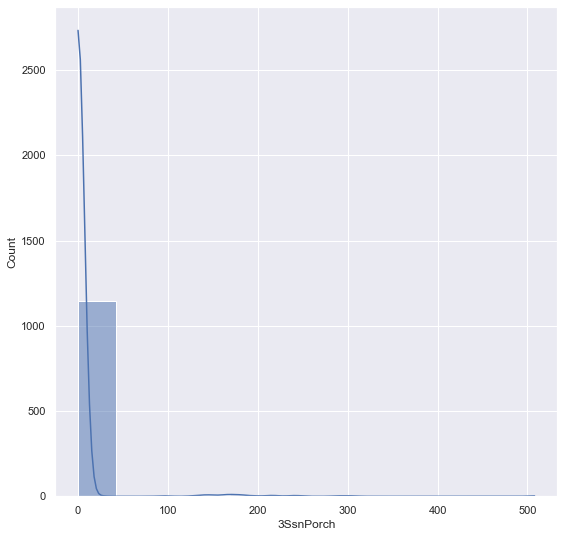

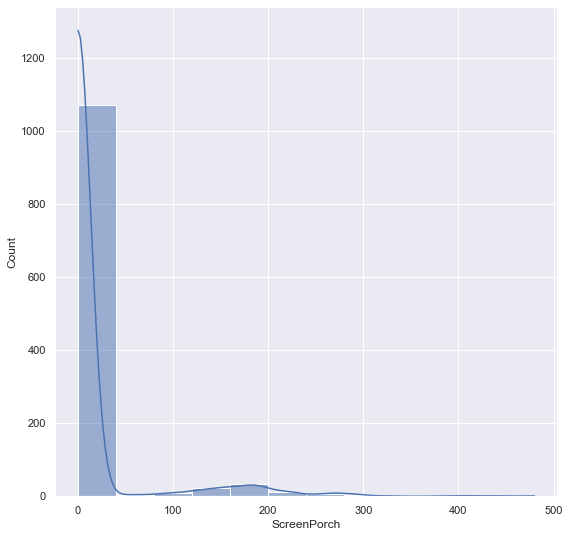

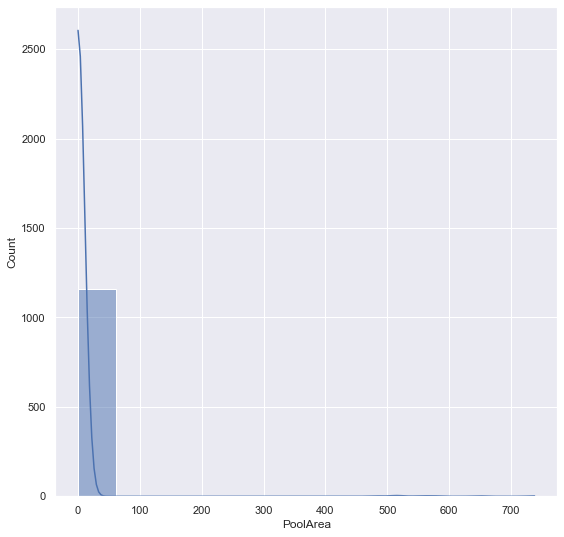

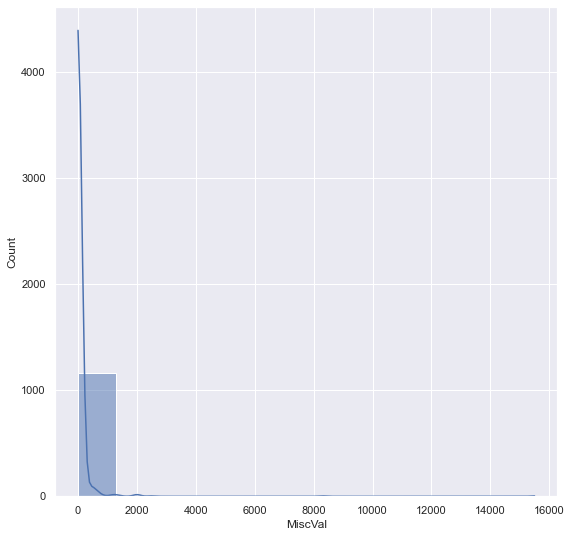

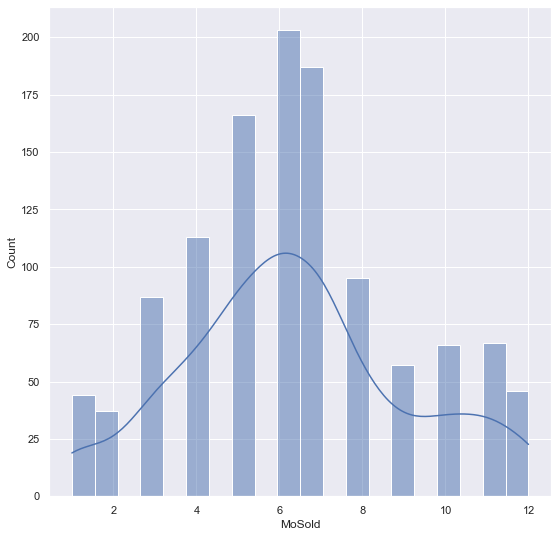

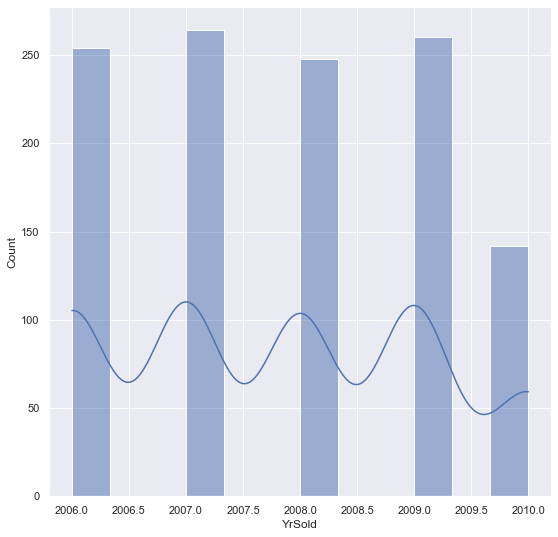

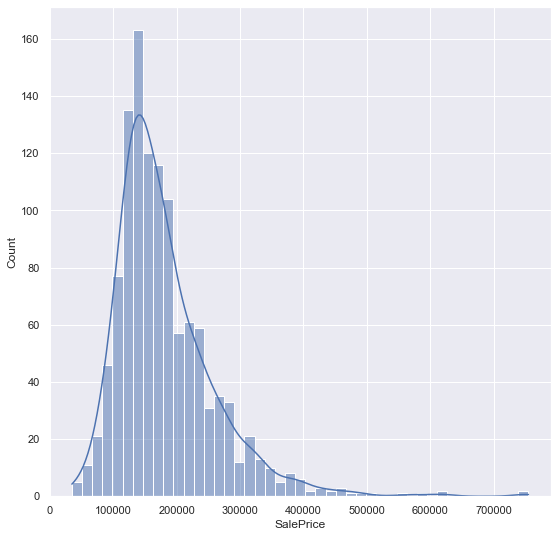

In [117]:
#Creating histplot of all the columns which we have added in the numer list.
sns.set(rc={'figure.figsize':(9,9)})
for i in numer:
    sns.histplot(data=df_train, x=i, kde=True)
    plt.show()

#We are taking threshold as +4/-4 ,if skewness is greater than +4 or -4 then we will call them heavily skewed.
#If skewness is greater than 0.5 and less than 4 then we will call it as lightly skewed.
#If the skewness is very close to zero (less than 0.5) then we will call it as normally distributed.


1. Heavily skewed to the right  side :- 

                    LotArea,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice



2. Heavily skewed to the left side:-


3. Lightly skewed to the right  side:-

         MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch



4. Lightly skewed to the left  side:-

                  YearBuilt,YearRemodAdd,GarageYrBlt



5. Approximately normally distibuted:-

       OverallQual,OverallCond,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageCars,GarageArea,MoSold,YrSold




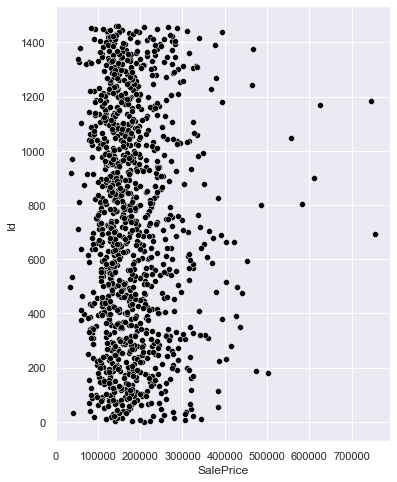

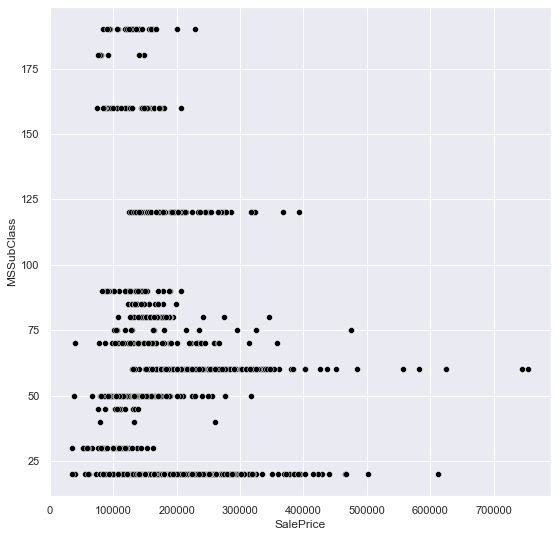

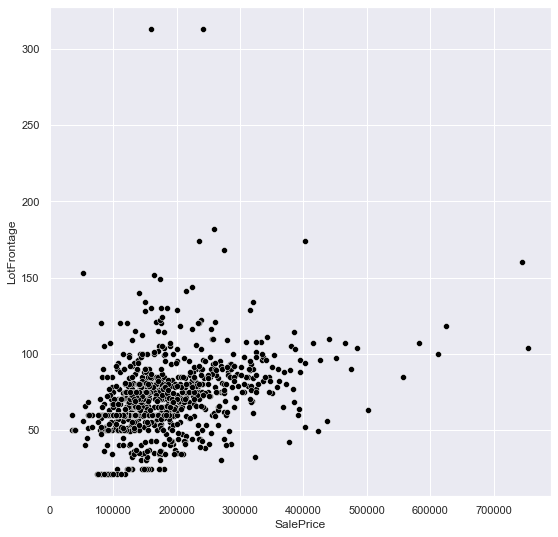

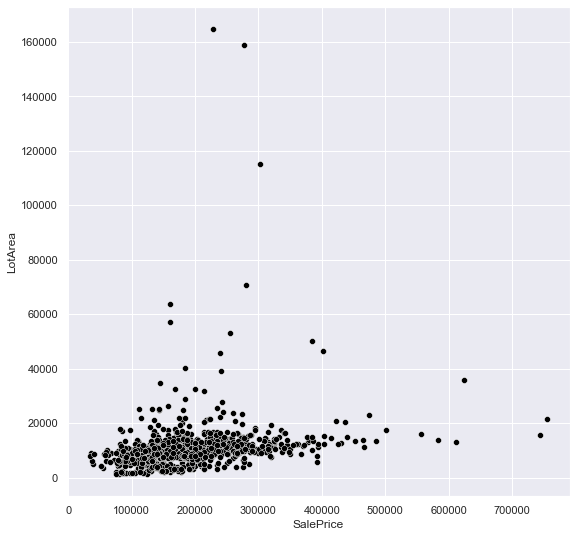

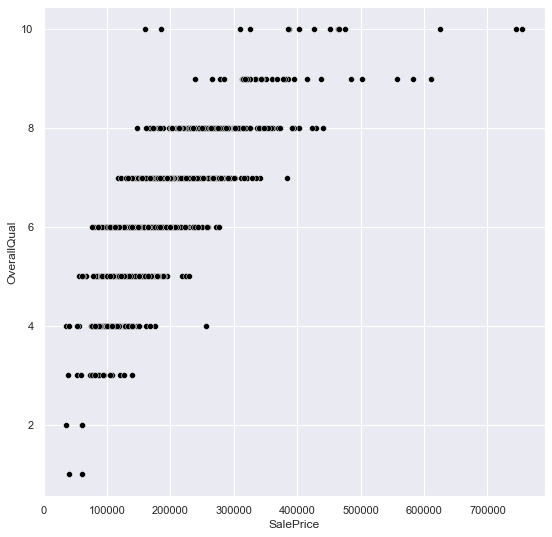

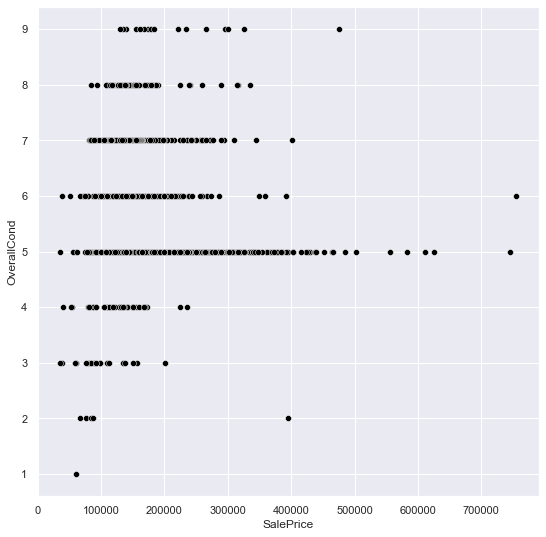

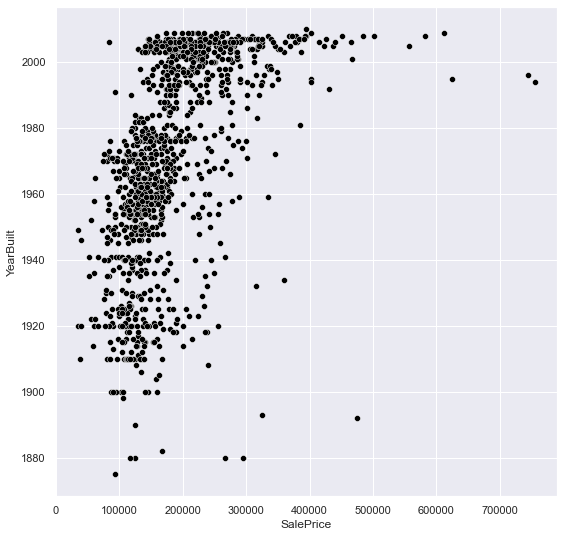

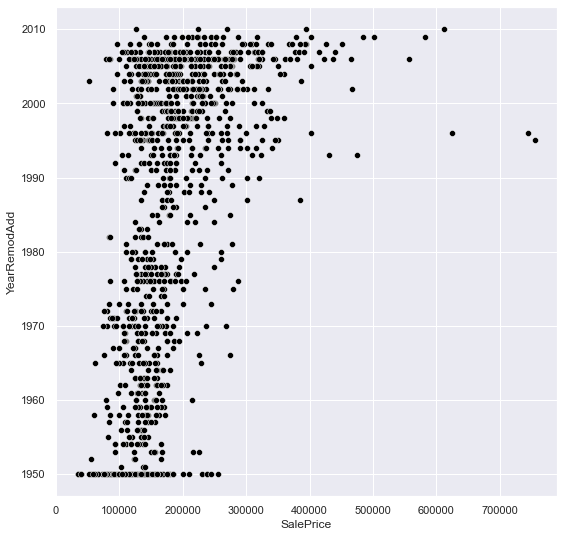

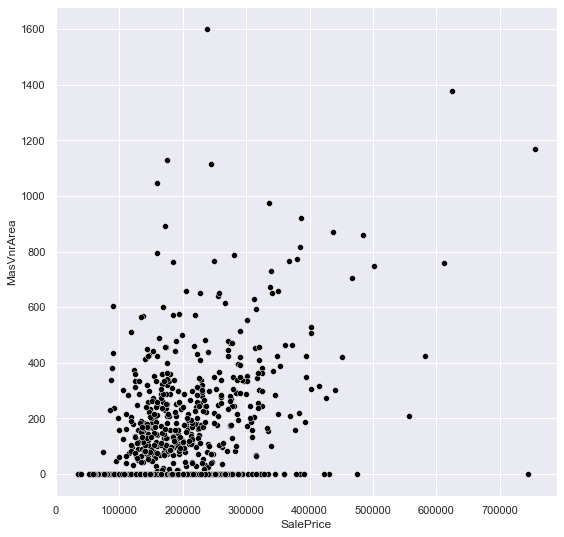

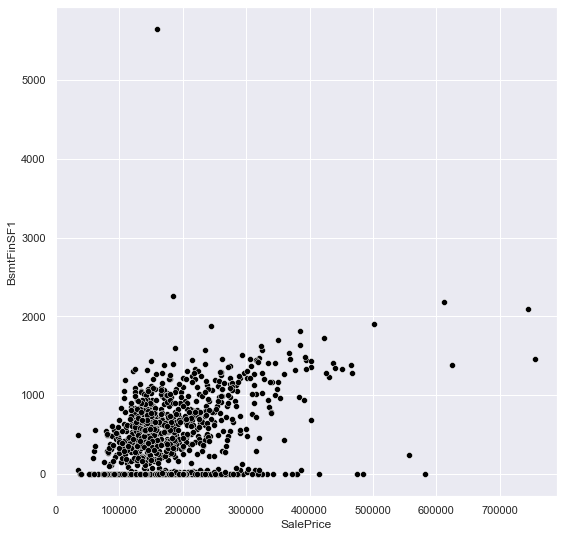

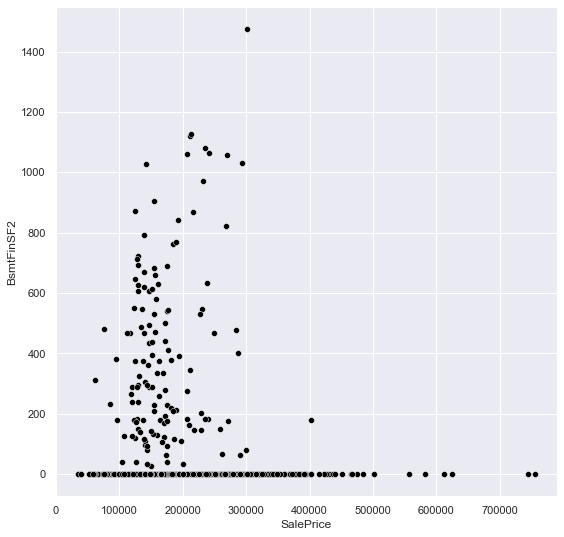

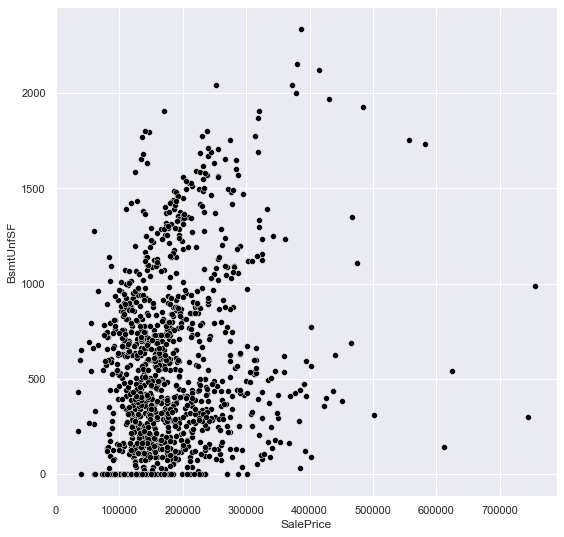

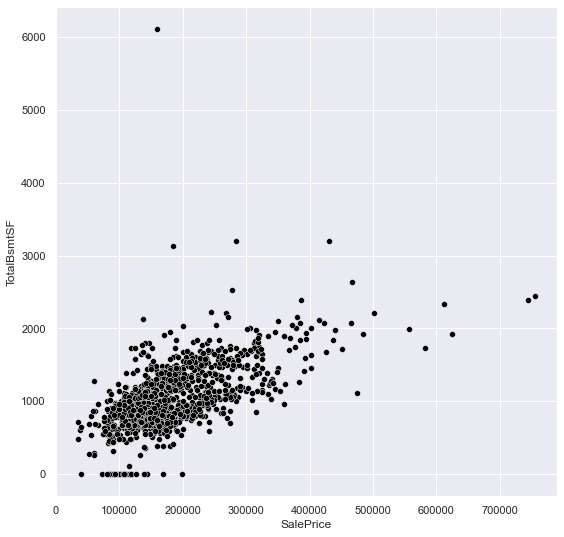

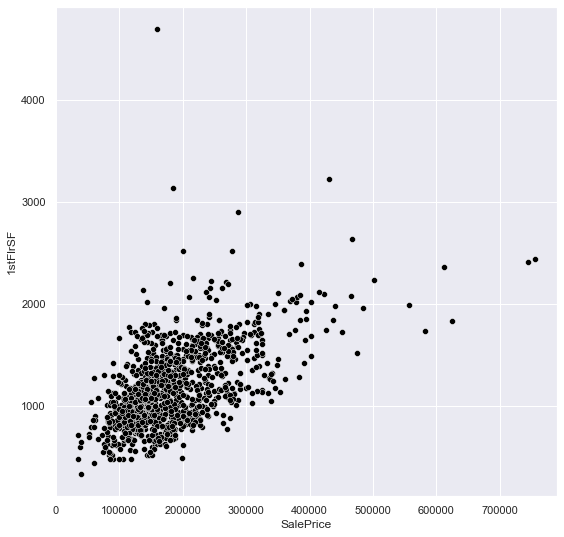

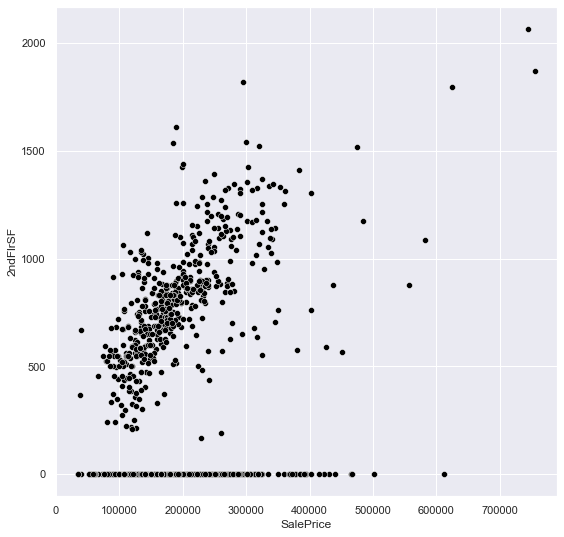

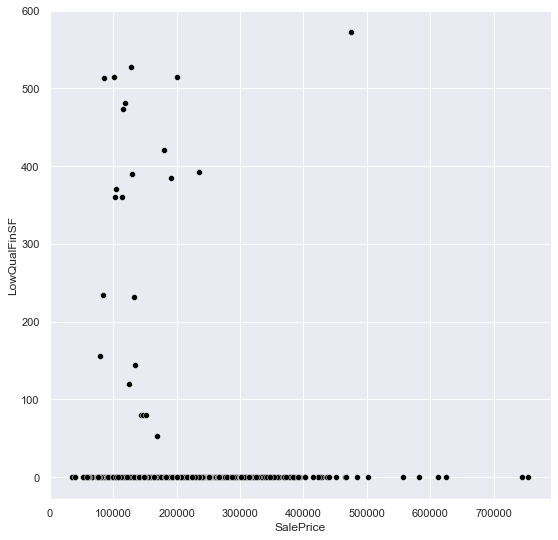

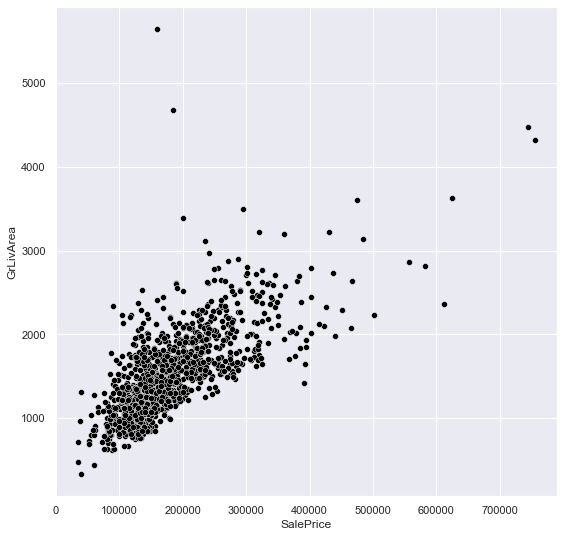

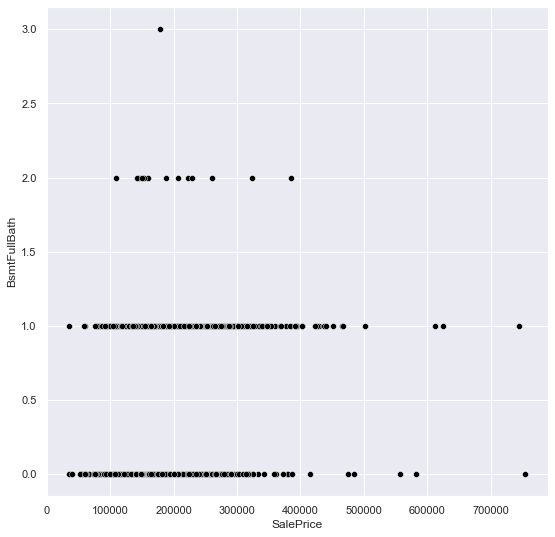

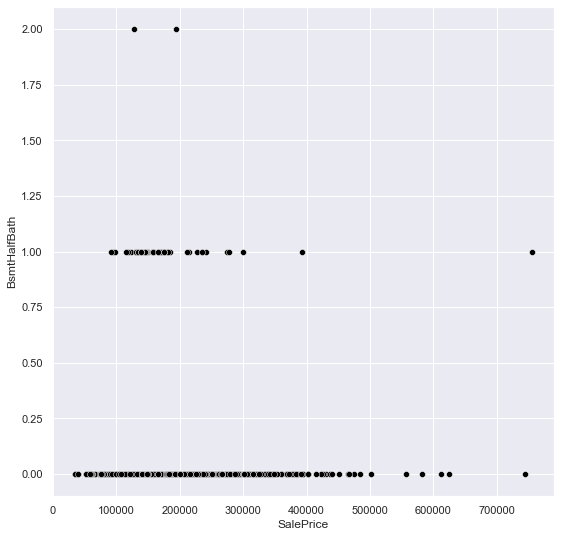

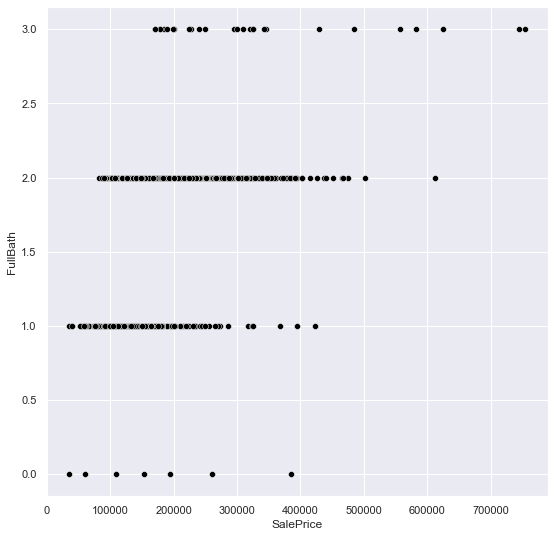

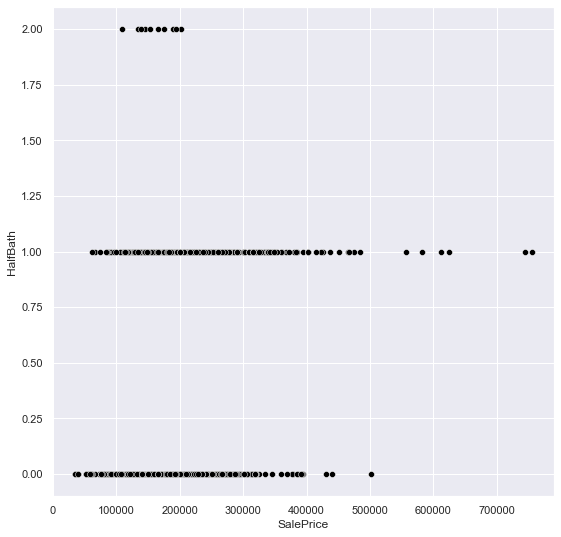

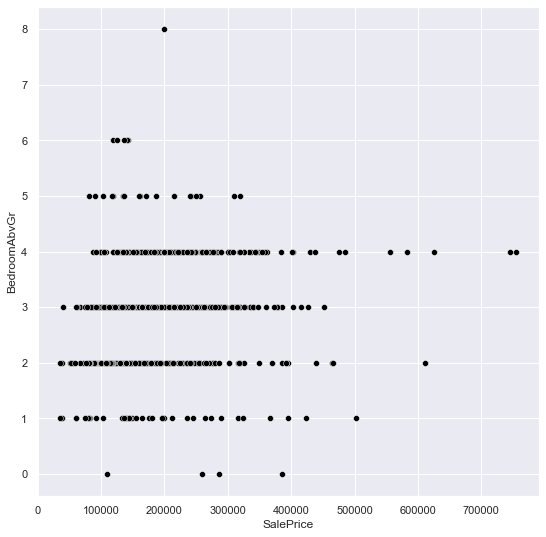

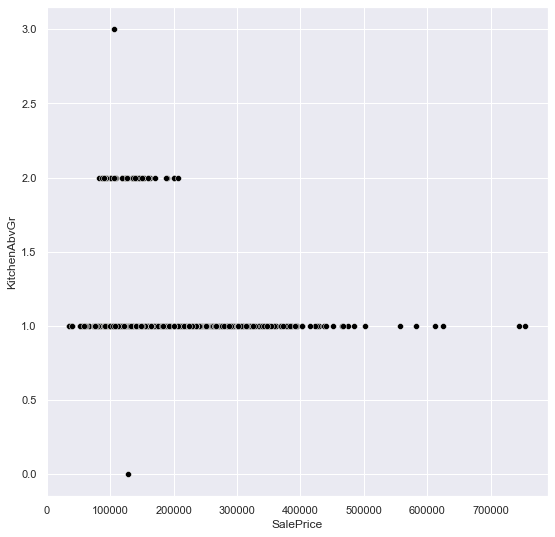

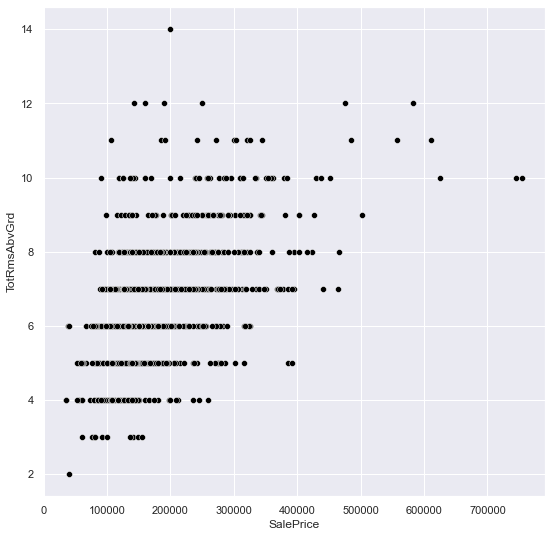

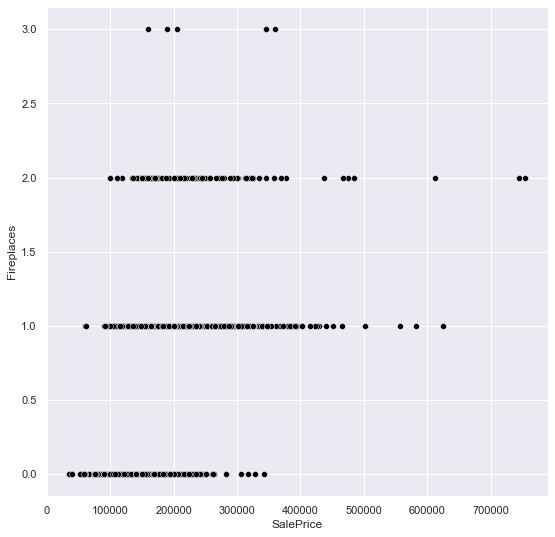

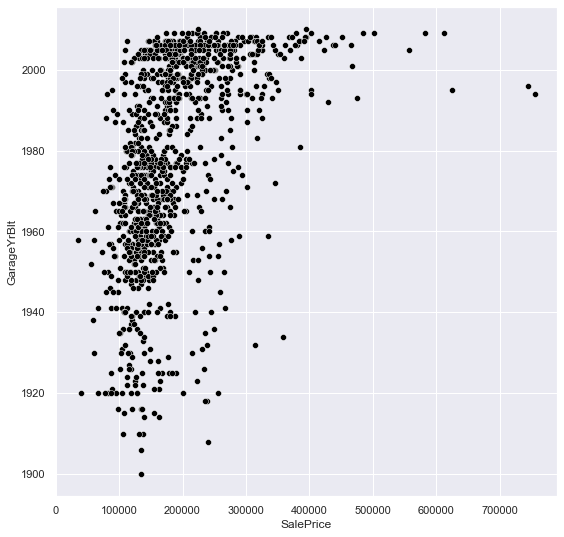

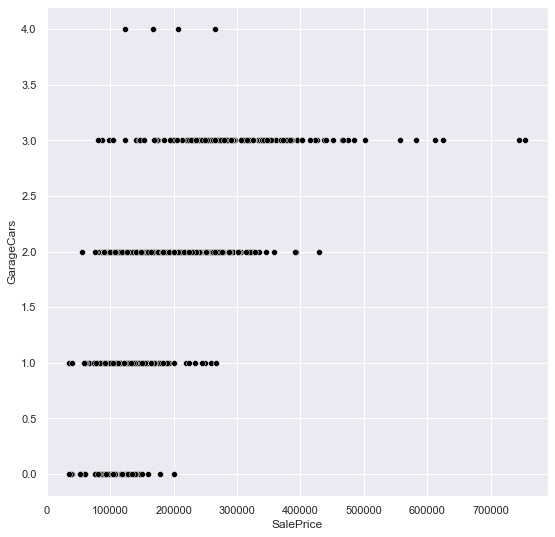

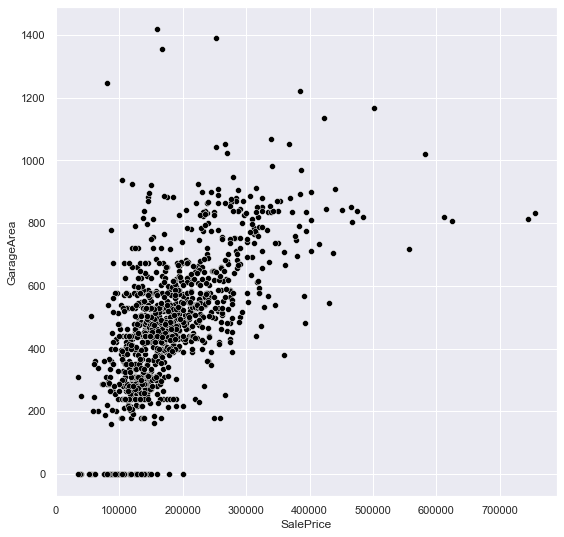

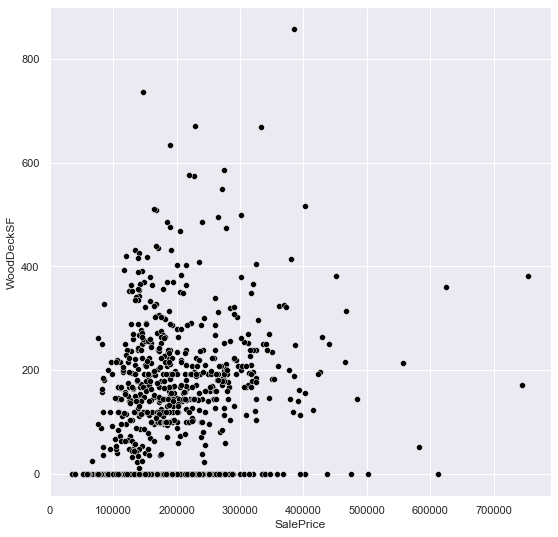

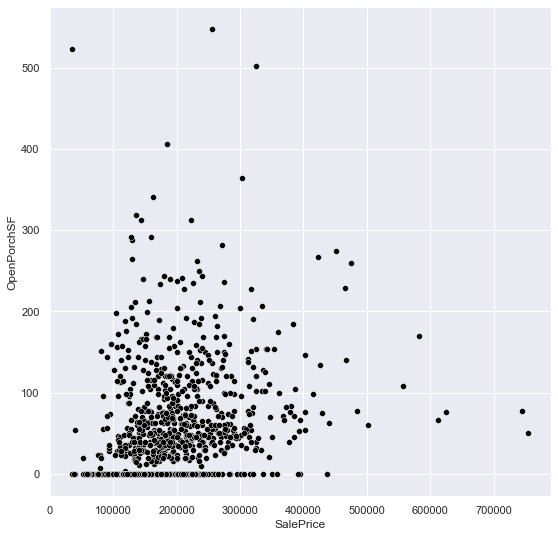

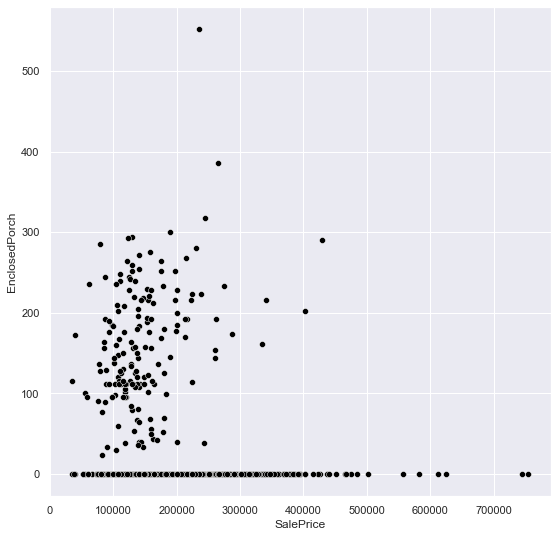

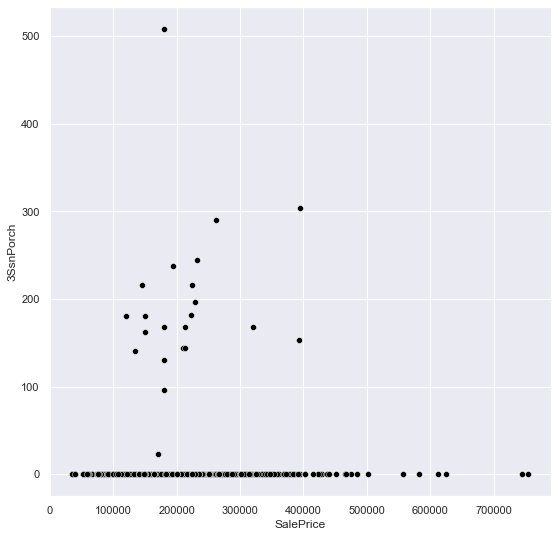

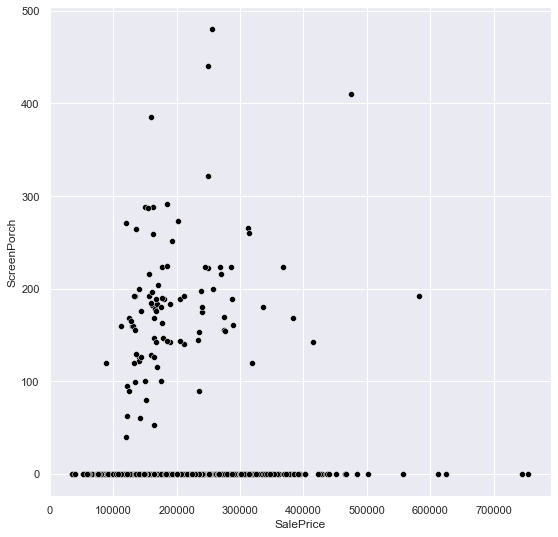

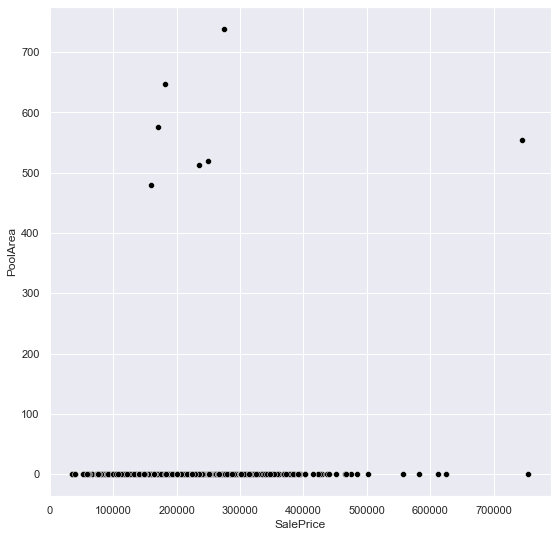

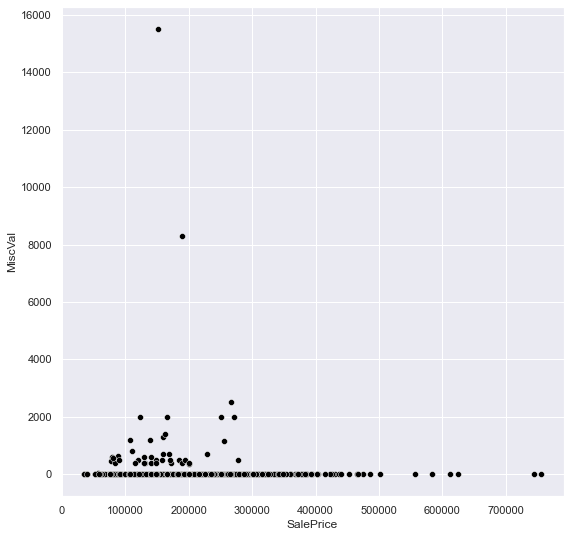

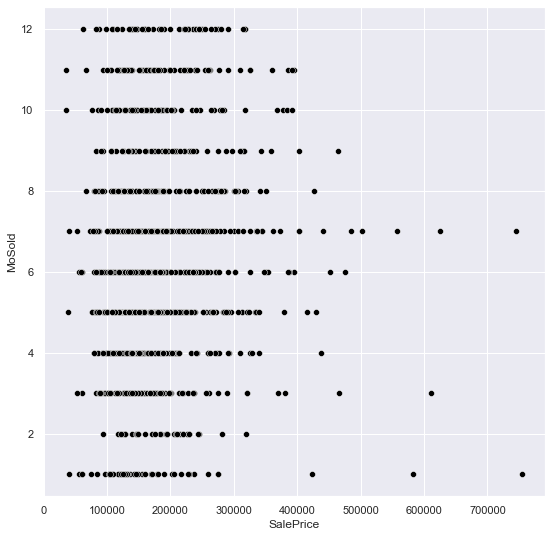

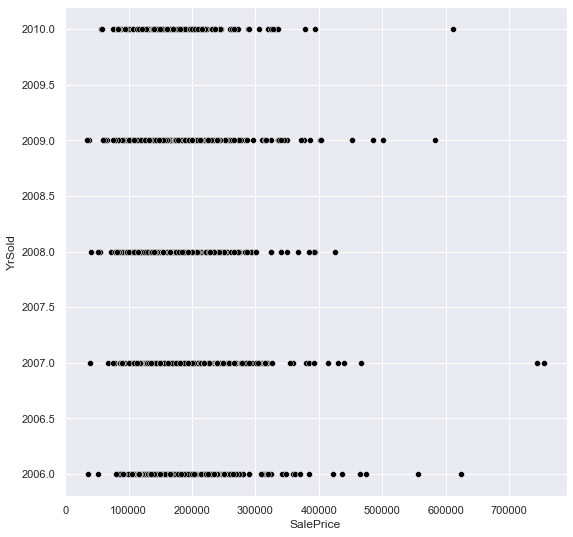

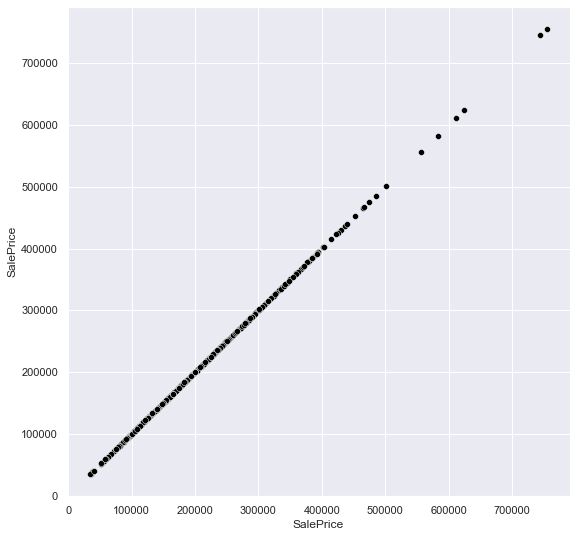

In [118]:
#Plotting scatterplot between "SalePrice" and all other numerical variable column.
plt.figure(figsize=(6,8))
x = df_train.drop(obj,axis = 1)
for i in x.columns:
    sns.scatterplot(x = 'SalePrice',y = i,data = x,color = 'black')
    plt.show()

#Correlation between SalePrice and various columns are given as following:-

1.LotFrontage-->    0.3412

2.LotArea -->       0.2494

3.OverallQual-->    0.7891

4.OverallCond-->   -0.0656

5.YearBuilt-->      0.5144

6.YearRemodAdd-->   0.5078

7.MasVnrArea-->     0.4663

8.BsmtFinSF1-->     0.3628

9.BsmtFinSF2-->    -0.0101

10.BsmtUnfSF-->     0.2157

11.TotalBsmtSF-->   0.5950

12.1stFlrSF-->      0.5876

13.2ndFlrSF-->      0.3303

14.LowQualFinSF--> -0.0323

15.GrLivArea-->     0.7073

16.HalfBath-->      0.2955

17.BedroomAbvGr-->  0.1582

18.TotRmsAbvGrd-->  0.5283

19.GarageYrBlt-->   0.4743

20.GarageArea-->    0.6189

21.WoodDeckSF-->    0.3154

22.OpenPorchSF-->   0.3394

23.EnclosedPorch-->-0.1150

24.3SsnPorch-->     0.0601

25.ScreenPorch-->   0.1002

26.PoolArea-->      0.1032

27.MiscVa-->       -0.0130

28.YrSold-->       -0.0455

29.MoSold-->        0.0727


We can see that most important features for predicting the sales price is :-

OverallQual,GrLivArea,GarageArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,YearBuilt etc.

In [119]:
x

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          1976          1976         0.0         120           0        958   
1          1970          1970         0.0         351         823       1043   
2          1996          1997         0.0         862           0        255   
3          1977          1977       480.0         705           0       1139   
4          1977          2000       126.0        1246           0        356   
...         ...           ...         ...         ...         ...        ...   
1163       1967          1967        31.0         450           0        432   
1164       1949          2003         0.0           0           0          0   
1165       1976          1976         0.0         566           0        289   
1166       1920          1950         0.0           0           0        649   
1167       2002          2003         0.0         457           0        326   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0            1078       958         0             0        958             0   
1            2217      2217         0             0       2217             1   
2            1117      1127       886             0       2013             1   
3            1844      1844         0             0       1844             0   
4            1602      1602         0             0       1602             0   
...           ...       ...       ...           ...        ...           ...   
1163          882       900         0             0        900             0   
1164            0      1126         0             0       1126             0   
1165          855       855       601             0       1456             0   
1166          649       649       668             0       1317             0   
1167          783       807       702             0       1509             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         0             2             1   
1                0         2         0             4             1   
2                0         2         1             3             1   
3                0         2         0             3             1   
4                1         2         0             3             1   
...            ...       ...       ...           ...           ...   
1163             0         1         0             3             1   
1164             0         2         0             2             1   
1165             0         2         1             3             1   
1166             0         1         0             3             1   
1167             0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                5           1       1977.0           2         440   
1                8           1       1970.0           2         621   
2                8           1       1997.0           2         455   
3                7           1       1977.0           2         546   
4           

In [120]:
len(numer)

38

In [121]:
len(obj)

38

In [122]:
#Let us first replace all the null values in numerical columns of the datasets.
#We are replacing the nan value by the median ,since columns have outliers and we know that median is less prone to the outliers in comparision to mean.

#For training dataset.
df_train['LotFrontage'].fillna(df_train['LotFrontage'].median(), inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(), inplace=True)

#For test dataset.
df_test['LotFrontage'].fillna(df_test['LotFrontage'].median(), inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(), inplace=True)



In [123]:
#Let us  replace all the null values in categorical columns of the datasets.
#We are replacing the nan values in categorical columns with the mode.

#for training dataset
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0],inplace=True)
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0],inplace=True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0],inplace=True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0],inplace=True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0],inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0],inplace=True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0],inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0],inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0],inplace=True)
df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0],inplace=True)
df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0],inplace=True)


#for test dataset.
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0],inplace=True)
df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0],inplace=True)
df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0],inplace=True)
df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0],inplace=True)
df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0],inplace=True)
df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0],inplace=True)
df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0],inplace=True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0],inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0],inplace=True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0],inplace=True)
df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0],inplace=True)
df_test['Electrical'].fillna(df_test['Electrical'].mode()[0],inplace=True)





In [124]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     127         120       RL         70.0     4928   Pave      IR1   
1     889          20       RL         95.0    15865   Pave      IR1   
2     793          60       RL         92.0     9920   Pave      IR1   
3     110          20       RL        105.0    11751   Pave      IR1   
4     422          20       RL         70.0    16635   Pave      IR1   
...   ...         ...      ...          ...      ...    ...      ...   
1163  289          20       RL         70.0     9819   Pave      IR1   
1164  554          20       RL         67.0     8777   Pave      Reg   
1165  196         160       RL         24.0     2280   Pave      Reg   
1166   31          70  C (all)         50.0     8500   Pave      Reg   
1167  617          60       RL         70.0     7861   Pave      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1            Lvl    AllPub    Inside       Mod        NAmes       Norm   
2            Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3            Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4            Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1163         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
1164         Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
1165         Lvl    AllPub       FR2       Gtl      NPkVill       Norm   
1166         Lvl    AllPub    Inside       Gtl       IDOTRR      Feedr   
1167         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm   TwnhsE     1Story            6            5       1976   
1          Norm     1Fam     1Story            8            6       1970   
2          Norm     1Fam     2Story            7            5       1996   
3          Norm     1Fam     1Story            6            6       1977   
4          Norm     1Fam     1Story            6            7       1977   
...         ...      ...        ...          ...          ...        ...   
1163       Norm     1Fam     1Story            5            5       1967   
1164       Norm     1Fam     1Story            4            5       1949   
1165       Norm    Twnhs     2Story            6            6       1976   
1166       Norm     1Fam     2Story            4            4       1920   
1167       Norm     1Fam     2Story            6            5       2002   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1976     Gable  CompShg     Plywood     Plywood       None   
1             1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2             1997     Gable  CompShg     MetalSd     MetalSd       None   
3             1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4             2000     Gable  CompShg     CemntBd     CmentBd      Stone   
...            ...       ...      ...         ...         ...        ...   
1163          1967     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1164          2003     Gable  CompShg     VinylSd     VinylSd       None   
1165          1976     Gable  CompShg     Plywood     Brk Cmn       None   
1166          1950   Gambrel  CompShg     BrkFace     BrkFace       None   
1167          2003     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       Gd       TA   
1            0.0        Gd        Gd      PConc       TA       Gd   
2            0.0        Gd        TA      PConc       Gd       TA   
3          480.0        TA        TA     CBlock       Gd       TA   
4          126.0        Gd        TA     CBlock       Gd       TA   
...          

In [125]:
#Lets delete the column "Utilities" from both training and test dataset since it has only one categorical value present throughout the column.
df_train=df_train.drop('Utilities',axis=1)
df_test=df_test.drop('Utilities',axis=1)

In [126]:
#Checking the "Id" column of the training dataset.
df_train["Id"].value_counts()

1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64

In [127]:
#Lets us remove the "ID" column from both test and training dataset since they represents unique value for each rows.
df_train=df_train.drop('Id',axis=1)
df_test=df_test.drop('Id',axis=1)


In [128]:
df_train.shape

(1168, 74)

In [129]:
df_test.shape

(292, 73)

In [130]:
df_train

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL         70.0     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL         70.0    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL         70.0     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL         70.0     7861   Pave      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1       Inside       Mod        NAmes       Norm       Norm     1Fam   
2      CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3       Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4          FR2       Gtl       NWAmes       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1163    Inside       Gtl       Sawyer       Norm       Norm     1Fam   
1164    Inside       Gtl      Edwards      Feedr       Norm     1Fam   
1165       FR2       Gtl      NPkVill       Norm       Norm    Twnhs   
1166    Inside       Gtl       IDOTRR      Feedr       Norm     1Fam   
1167    Inside       Gtl      Gilbert       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        1Story            6            5       1976          1976     Gable   
1        1Story            8            6       1970          1970      Flat   
2        2Story            7            5       1996          1997     Gable   
3        1Story            6            6       1977          1977       Hip   
4        1Story            6            7       1977          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1163     1Story            5            5       1967          1967     Gable   
1164     1Story            4            5       1949          2003     Gable   
1165     2Story            6            6       1976          1976     Gable   
1166     2Story            4            4       1920          1950   Gambrel   
1167     2Story            6            5       2002          2003     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     Plywood     Plywood       None         0.0        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2     CompShg     MetalSd     MetalSd       None         0.0        Gd   
3     CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4     CompShg     CemntBd     CmentBd      Stone       126.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        31.0        TA   
1164  CompShg     VinylSd     VinylSd       None         0.0        TA   
1165  CompShg     Plywood     Brk Cmn       None         0.0        TA   
1166  CompShg     BrkFace     BrkFace       None         0.0        TA   
1167  CompShg     VinylSd     VinylSd       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA     CBlock       Gd       TA           No          ALQ   
1           Gd      PConc       TA       Gd           Gd          ALQ   
2           TA      PConc       Gd       TA           Av          GLQ   
3           TA     CBlock       Gd       TA       

In [131]:
#Lets see the categorical value and their frequency in the "Street"  column.
df_train["Street"].value_counts()

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [132]:
#Lets us remove the "Street" column from both test and training dataset ,since more than 99% of rows contains the same categorical value.
df_train=df_train.drop('Street',axis=1)
df_test=df_test.drop('Street',axis=1)


In [133]:
df_train

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0            120       RL         70.0     4928      IR1         Lvl   
1             20       RL         95.0    15865      IR1         Lvl   
2             60       RL         92.0     9920      IR1         Lvl   
3             20       RL        105.0    11751      IR1         Lvl   
4             20       RL         70.0    16635      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1163          20       RL         70.0     9819      IR1         Lvl   
1164          20       RL         67.0     8777      Reg         Lvl   
1165         160       RL         24.0     2280      Reg         Lvl   
1166          70  C (all)         50.0     8500      Reg         Lvl   
1167          60       RL         70.0     7861      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1       Inside       Mod        NAmes       Norm       Norm     1Fam   
2      CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3       Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4          FR2       Gtl       NWAmes       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1163    Inside       Gtl       Sawyer       Norm       Norm     1Fam   
1164    Inside       Gtl      Edwards      Feedr       Norm     1Fam   
1165       FR2       Gtl      NPkVill       Norm       Norm    Twnhs   
1166    Inside       Gtl       IDOTRR      Feedr       Norm     1Fam   
1167    Inside       Gtl      Gilbert       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        1Story            6            5       1976          1976     Gable   
1        1Story            8            6       1970          1970      Flat   
2        2Story            7            5       1996          1997     Gable   
3        1Story            6            6       1977          1977       Hip   
4        1Story            6            7       1977          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1163     1Story            5            5       1967          1967     Gable   
1164     1Story            4            5       1949          2003     Gable   
1165     2Story            6            6       1976          1976     Gable   
1166     2Story            4            4       1920          1950   Gambrel   
1167     2Story            6            5       2002          2003     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     Plywood     Plywood       None         0.0        TA   
1     Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2     CompShg     MetalSd     MetalSd       None         0.0        Gd   
3     CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4     CompShg     CemntBd     CmentBd      Stone       126.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1163  CompShg     MetalSd     MetalSd    BrkFace        31.0        TA   
1164  CompShg     VinylSd     VinylSd       None         0.0        TA   
1165  CompShg     Plywood     Brk Cmn       None         0.0        TA   
1166  CompShg     BrkFace     BrkFace       None         0.0        TA   
1167  CompShg     VinylSd     VinylSd       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA     CBlock       Gd       TA           No          ALQ   
1           Gd      PConc       TA       Gd           Gd          ALQ   
2           TA      PConc       Gd       TA           Av          GLQ   
3           TA     CBlock       Gd       TA           No          BLQ   
4           TA     CBlock       Gd       TA           No     

In [134]:
df_train["CentralAir"].value_counts()

Y    1090
N      78
Name: CentralAir, dtype: int64

In [135]:
df_train["GarageYrBlt"].value_counts()

2006.0    116
2005.0     51
2007.0     40
2003.0     37
2004.0     36
         ... 
1908.0      1
1900.0      1
1906.0      1
1927.0      1
1933.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [136]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch'

In [137]:
#We are dropping few irrelevant features from the training dataset.
df_train = df_train.drop(['Condition2','YearRemodAdd','Heating','GarageCars','GarageQual','MiscVal','MoSold','YrSold','SaleCondition'], axis=1)

In [138]:
#We are dropping few irrelevant features from the test dataset.
df_test = df_test.drop(['Condition2','YearRemodAdd','Heating','GarageCars','GarageQual','MiscVal','MoSold','YrSold','SaleCondition'], axis=1)

In [139]:
df_train

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0            120       RL         70.0     4928      IR1         Lvl   
1             20       RL         95.0    15865      IR1         Lvl   
2             60       RL         92.0     9920      IR1         Lvl   
3             20       RL        105.0    11751      IR1         Lvl   
4             20       RL         70.0    16635      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1163          20       RL         70.0     9819      IR1         Lvl   
1164          20       RL         67.0     8777      Reg         Lvl   
1165         160       RL         24.0     2280      Reg         Lvl   
1166          70  C (all)         50.0     8500      Reg         Lvl   
1167          60       RL         70.0     7861      IR1         Lvl   

     LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle  \
0       Inside       Gtl      NPkVill       Norm   TwnhsE     1Story   
1       Inside       Mod        NAmes       Norm     1Fam     1Story   
2      CulDSac       Gtl      NoRidge       Norm     1Fam     2Story   
3       Inside       Gtl       NWAmes       Norm     1Fam     1Story   
4          FR2       Gtl       NWAmes       Norm     1Fam     1Story   
...        ...       ...          ...        ...      ...        ...   
1163    Inside       Gtl       Sawyer       Norm     1Fam     1Story   
1164    Inside       Gtl      Edwards      Feedr     1Fam     1Story   
1165       FR2       Gtl      NPkVill       Norm    Twnhs     2Story   
1166    Inside       Gtl       IDOTRR      Feedr     1Fam     2Story   
1167    Inside       Gtl      Gilbert       Norm     1Fam     2Story   

      OverallQual  OverallCond  YearBuilt RoofStyle RoofMatl Exterior1st  \
0               6            5       1976     Gable  CompShg     Plywood   
1               8            6       1970      Flat  Tar&Grv     Wd Sdng   
2               7            5       1996     Gable  CompShg     MetalSd   
3               6            6       1977       Hip  CompShg     Plywood   
4               6            7       1977     Gable  CompShg     CemntBd   
...           ...          ...        ...       ...      ...         ...   
1163            5            5       1967     Gable  CompShg     MetalSd   
1164            4            5       1949     Gable  CompShg     VinylSd   
1165            6            6       1976     Gable  CompShg     Plywood   
1166            4            4       1920   Gambrel  CompShg     BrkFace   
1167            6            5       2002     Gable  CompShg     VinylSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        Plywood       None         0.0        TA        TA     CBlock   
1        Wd Sdng       None         0.0        Gd        Gd      PConc   
2        MetalSd       None         0.0        Gd        TA      PConc   
3        Plywood    BrkFace       480.0        TA        TA     CBlock   
4        CmentBd      Stone       126.0        Gd        TA     CBlock   
...          ...        ...         ...       ...       ...        ...   
1163     MetalSd    BrkFace        31.0        TA        Gd     CBlock   
1164     VinylSd       None         0.0        TA        TA     CBlock   
1165     Brk Cmn       None         0.0        TA        TA     CBlock   
1166     BrkFace       None         0.0        TA        Fa     BrkTil   
1167     VinylSd       None         0.0        Gd        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          ALQ         120          Unf   
1          TA       Gd           Gd          ALQ         351          Rec   
2          Gd       TA           Av          GLQ         862          Unf   
3          Gd       TA           No          BLQ         705          Unf   
4          Gd       TA           No          ALQ        1246          Unf   
...       ..

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LandContour    1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   LandSlope      1168 non-null   object 
 8   Neighborhood   1168 non-null   object 
 9   Condition1     1168 non-null   object 
 10  BldgType       1168 non-null   object 
 11  HouseStyle     1168 non-null   object 
 12  OverallQual    1168 non-null   int64  
 13  OverallCond    1168 non-null   int64  
 14  YearBuilt      1168 non-null   int64  
 15  RoofStyle      1168 non-null   object 
 16  RoofMatl       1168 non-null   object 
 17  Exterior1st    1168 non-null   object 
 18  Exterior

In [141]:
#Creating an empty list obj_1 and adding the object datatype columns from the training dataset to this list.
obj_1 = []
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        obj_1.append(i)

In [142]:
#List containing all object datatype columns from the training dataset.
obj_1

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'SaleType']

In [143]:
#Creating dummy variables of all the object datatype columns from training dataset and removing one dummy variable from each column to cope up with dummy variable trap.
df_train=pd.get_dummies(data=df_train,columns=obj_1,drop_first=True)
df_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0            0.0         120           0        958         1078       958   
1            0.0         351         823       1043         2217      2217   
2            0.0         862           0        255         1117      1127   
3          480.0         705           0       1139         1844      1844   
4          126.0        1246           0        356         1602      1602   
...          ...         ...         ...        ...          ...       ...   
1163        31.0         450           0        432          882       900   
1164         0.0           0           0          0            0      1126   
1165         0.0         566           0        289          855       855   
1166         0.0           0           0        649          649       649   
1167         0.0         457           0        326          783       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0            0             0        958             0             0         2   
1            0             0       2217             1             0         2   
2          886             0       2013             1             0         2   
3            0             0       1844             0             0         2   
4            0             0       1602             0             1         2   
...        ...           ...        ...           ...           ...       ...   
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            0             2             1             5           1   
1            0             4             1             8           1   
2            1             3             1             8           1   
3            0             3             1             7           1   
4            0             3             1             8           1   
...        ...           ...           ...           ...         ...   
1163         0             3             1             5           0   
1164         0             2             1             5           0   
1165         1             3             1             7           1   
1166         0             3             1             6           0   
1167         1             3             1             7           1   

      GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          1977.0         440           0          205              0   
1          1970.0         621          81          207              0   
2          1997.0         455         180          130         

In [144]:
#Creating dummy variables of all the object datatype columns from test dataset and removing one dummy variable from each column to cope up with dummy variable trap.
df_test=pd.get_dummies(data=df_test,columns=obj_1,drop_first=True)
df_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         200.0        1249           0        673         1922      1922   
1           0.0        1036           0        184         1220      1360   
2           0.0           0           0       1753         1753      1788   
3           0.0         275           0        429          704       860   
4          74.0           0           0        894          894       894   
..          ...         ...         ...        ...          ...       ...   
287       468.0          33           0       1530         1563      1563   
288         0.0         686           0        304          990       990   
289       180.0         578           0        426         1004      1004   
290         0.0         399           0        605         1004      1004   
291       408.0         309           0        174          483       483   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0             0       1922             1             0         2   
1           0             0       1360             1             0         1   
2           0             0       1788             0             0         2   
3         704             0       1564             0             0         1   
4        1039             0       1933             0             0         2   
..        ...           ...        ...           ...           ...       ...   
287         0             0       1563             0             0         2   
288         0             0        990             0             1         1   
289         0             0       1004             1             0         1   
290       660             0       1664             0             0         2   
291       504             0        987             0             0         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0             3             1             8           1   
1           0             1             1             4           1   
2           0             3             1             7           1   
3           1             3             1             7           1   
4           1             4             1             9           1   
..        ...           ...           ...           ...         ...   
287         0             3             1             6           1   
288         0             3             1             5           0   
289         0             2             1             5           1   
290         0             3             1             7           2   
291         1             2             1             5           0   

     GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2005.0         676         178           51              0   
1         1984.0         565          63            0              0   
2         2001.0         522         202          151              0   
3         1941.0         234           0 

In [145]:
column_train=df_train.columns

In [146]:
column_test=df_test.columns

In [147]:
#All column names from training dataset.
column_train
    

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=203)

In [148]:
#All column names from the test dataset.
column_test

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD'],
      dtype='object', length=182)

In [149]:
#Printing those columns which are there in training dataset but they are not present in test dataset.
for i in column_train:
    if i not in column_test:
        print(i)

SalePrice
MSZoning_RH
Neighborhood_Blueste
Condition1_RRNe
RoofStyle_Shed
RoofMatl_CompShg
RoofMatl_Membran
RoofMatl_Metal
RoofMatl_Roll
RoofMatl_WdShngl
Exterior1st_AsphShn
Exterior1st_ImStucc
Exterior1st_Stone
Exterior2nd_AsphShn
Exterior2nd_Other
ExterCond_Po
BsmtCond_Po
HeatingQC_Po
Electrical_Mix
Functional_Sev
SaleType_Con
SaleType_ConLI
SaleType_Oth


In [150]:
#Printing those columns which are there in test dataset but they are not present in training dataset.
for i in column_test:
    if i not in column_train:
        print(i)

Exterior1st_CBlock
Exterior2nd_CBlock


In [151]:
#We are creating a list of columns which are needed to be deleted since they do not exist in test dataset.
columns_del_train=['MSZoning_RH',
'Neighborhood_Blueste',
'Condition1_RRNe',
'RoofStyle_Shed',
'RoofMatl_CompShg',
'RoofMatl_Membran',
'RoofMatl_Metal',
'RoofMatl_Roll',
'RoofMatl_WdShngl',
'Exterior1st_AsphShn',
'Exterior1st_ImStucc',
'Exterior1st_Stone',
'Exterior2nd_AsphShn',
'Exterior2nd_Other',
'ExterCond_Po',
'BsmtCond_Po',
'HeatingQC_Po',
'Electrical_Mix',
'Functional_Sev',
'SaleType_Con',
'SaleType_ConLI',
'SaleType_Oth']

In [152]:
#Using the for loop to iterate through the list (columns_del_train) and delete each column.
for i in columns_del_train:
    df_train.drop([i], axis = 1,inplace=True)

In [153]:
#We are creating a list of features which are to be deleted from the test dataset since they do not exist in the training dataset.
columns_del_test=['Exterior1st_CBlock','Exterior2nd_CBlock']

In [154]:
#Using the for loop to iterate through the list (columns_del_test) and delete each column.
for i in columns_del_test:
    df_test.drop([i], axis = 1,inplace=True)

In [155]:
#Checking the shape of the training dataset
df_train.shape

(1168, 181)

In [156]:
#Checking the shape of the test dataset.
df_test.shape

(292, 180)

In [157]:
df_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0            0.0         120           0        958         1078       958   
1            0.0         351         823       1043         2217      2217   
2            0.0         862           0        255         1117      1127   
3          480.0         705           0       1139         1844      1844   
4          126.0        1246           0        356         1602      1602   
...          ...         ...         ...        ...          ...       ...   
1163        31.0         450           0        432          882       900   
1164         0.0           0           0          0            0      1126   
1165         0.0         566           0        289          855       855   
1166         0.0           0           0        649          649       649   
1167         0.0         457           0        326          783       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0            0             0        958             0             0         2   
1            0             0       2217             1             0         2   
2          886             0       2013             1             0         2   
3            0             0       1844             0             0         2   
4            0             0       1602             0             1         2   
...        ...           ...        ...           ...           ...       ...   
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            0             2             1             5           1   
1            0             4             1             8           1   
2            1             3             1             8           1   
3            0             3             1             7           1   
4            0             3             1             8           1   
...        ...           ...           ...           ...         ...   
1163         0             3             1             5           0   
1164         0             2             1             5           0   
1165         1             3             1             7           1   
1166         0             3             1             6           0   
1167         1             3             1             7           1   

      GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0          1977.0         440           0          205              0   
1          1970.0         621          81          207              0   
2          1997.0         455         180          130         

In [158]:
df_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0         200.0        1249           0        673         1922      1922   
1           0.0        1036           0        184         1220      1360   
2           0.0           0           0       1753         1753      1788   
3           0.0         275           0        429          704       860   
4          74.0           0           0        894          894       894   
..          ...         ...         ...        ...          ...       ...   
287       468.0          33           0       1530         1563      1563   
288         0.0         686           0        304          990       990   
289       180.0         578           0        426         1004      1004   
290         0.0         399           0        605         1004      1004   
291       408.0         309           0        174          483       483   

     2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0           0             0       1922             1             0         2   
1           0             0       1360             1             0         1   
2           0             0       1788             0             0         2   
3         704             0       1564             0             0         1   
4        1039             0       1933             0             0         2   
..        ...           ...        ...           ...           ...       ...   
287         0             0       1563             0             0         2   
288         0             0        990             0             1         1   
289         0             0       1004             1             0         1   
290       660             0       1664             0             0         2   
291       504             0        987             0             0         1   

     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0             3             1             8           1   
1           0             1             1             4           1   
2           0             3             1             7           1   
3           1             3             1             7           1   
4           1             4             1             9           1   
..        ...           ...           ...           ...         ...   
287         0             3             1             6           1   
288         0             3             1             5           0   
289         0             2             1             5           1   
290         0             3             1             7           2   
291         1             2             1             5           0   

     GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         2005.0         676         178           51              0   
1         1984.0         565          63            0              0   
2         2001.0         522         202          151              0   
3         1941.0         234           0 

In [159]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD'],
      dtype='object', length=181)

In [160]:
len(df_train.columns)

181

In [161]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleType_CWD', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_New', 'SaleType_WD'],
      dtype='object', length=181)

In [162]:
#Creating a list of all features present in the training dataset.
train_col=[]
for i in df_train.columns:
    train_col.append(i)

In [163]:
#Creating a list of all features present in the test dataset.
test_col=[]
for i in df_test.columns:
    test_col.append(i)

In [164]:
#List of features of training dataset.
train_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'SalePrice',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitc

In [165]:
#Rearranging the feature sequence of the training dataset.
df_train=df_train[['SalePrice','MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_ConLD',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD']]

In [166]:
df_train.head(3)

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     128000         120         70.0     4928            6            5   
1     268000          20         95.0    15865            8            6   
2     269790          60         92.0     9920            7            5   

   YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0       1976         0.0         120           0        958         1078   
1       1970         0.0         351         823       1043         2217   
2       1996         0.0         862           0        255         1117   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       1977.0         440           0          205              0          0   
1       1970.0         621          81          207              0          0   
2       1997.0         455         180          130              0          0   

   ScreenPorch  PoolArea  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0         0            0            1            0             0   
1          224         0            0            1            0             0   
2            0         0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0                0                0   
1             0             0                0                0   
2             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              0              0   
2                1                  1              0              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_BrDale  \
0                 1              0              0                    0   
1                 1              1              0                    0   
2                 0              0              0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     1                    0   
1                   1                     0                    0   
2                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0

In [167]:
df_test.head(3)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         86.0    14157            9            5       2005   
1         120         65.0     5814            8            5       1984   
2          20         65.0    11838            8            5       2001   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       200.0        1249           0        673         1922      1922   
1         0.0        1036           0        184         1220      1360   
2         0.0           0           0       1753         1753      1788   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0             0       1922             1             0         2   
1         0             0       1360             1             0         1   
2         0             0       1788             0             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         0             3             1             8           1   
1         0             1             1             4           1   
2         0             3             1             7           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0       2005.0         676         178           51              0          0   
1       1984.0         565          63            0              0          0   
2       2001.0         522         202          151              0          0   

   ScreenPorch  PoolArea  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0         0            0            1            0             0   
1            0         0            0            1            0             0   
2            0         0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0                1                0   
1             0             0                0                0   
2             0             1                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                0                  0              0              0   
1                1                  1              0              0   
2                1                  0              0              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_BrDale  \
0                 0              0              0                    0   
1                 0              0              0                    0   
2                 1              0              0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     1   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                 

In [168]:
#Checking the correlation of each columns from the training dataset with the target variable("SalePrice)".
corr_matrix=df_train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.789185
GrLivArea            0.707300
GarageArea           0.619000
TotalBsmtSF          0.595042
                       ...   
Foundation_CBlock   -0.355725
BsmtQual_TA         -0.503120
GarageFinish_Unf    -0.510620
KitchenQual_TA      -0.516605
ExterQual_TA        -0.582965
Name: SalePrice, Length: 181, dtype: float64

In [169]:
df_train.describe()

SalePrice   MSSubClass  LotFrontage        LotArea  OverallQual  \
count    1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean   181477.005993    56.767979    70.807363   10484.749144     6.104452   
std     79105.586863    41.940650    22.440317    8957.442311     1.390153   
min     34900.000000    20.000000    21.000000    1300.000000     1.000000   
25%    130375.000000    20.000000    60.000000    7621.500000     5.000000   
50%    163995.000000    50.000000    70.000000    9522.500000     6.000000   
75%    215000.000000    70.000000    79.250000   11515.500000     7.000000   
max    755000.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      5.595890  1970.930651   101.696918   444.726027    46.647260   
std       1.124343    30.145255   182.218483   462.664785   163.520016   
min       1.000000  1875.000000     0.000000     0.000000     0.000000   
25%       5.000000  1954.000000     0.000000     0.000000     0.000000   
50%       5.000000  1972.000000     0.000000   385.500000     0.000000   
75%       6.000000  2000.000000   160.000000   714.500000     0.000000   
max       9.000000  2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean    569.721747  1061.095034  1169.860445   348.826199      6.380137   
std     449.375525   442.272249   391.161983   439.696370     50.892844   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     216.000000   799.000000   892.000000     0.000000      0.000000   
50%     474.000000  1005.500000  1096.500000     0.000000      0.000000   
75%     816.000000  1291.500000  1392.000000   729.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean   1525.066781      0.425514      0.055651     1.562500     0.388699   
std     528.042957      0.521615      0.236699     0.551882     0.504929   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1143.250000      0.000000      0.000000     1.000000     0.000000   
50%    1468.500000      0.000000      0.000000     2.000000     0.000000   
75%    1795.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1168.000000   1168.000000   1168.000000  1168.000000  1168.000000   
mean       2.884418      1.045377      6.542808     0.617295  1979.717466   
std        0.817229      0.216292      1.598484     0.650575    25.012983   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1984.500000   
75%        3.000000      1.000000      7.000000     1.000000  2003.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    476.860445    96.206336    46.559932      23.015411     3.639555   
std     214.466769   126.158988    66.381023      63.191089    29.088867   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     338.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   171.000000    70.000000       0.0

In [170]:
#Rearranging the feature sequence of the training dataset for our convenience.
df_train=df_train[['SalePrice','MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_ConLD',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD']]

In [171]:
#Rearranging the feature sequence of the test dataset for our convenience.
df_test=df_test[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_ConLD',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD']]

In [172]:
df_train

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        128000         120         70.0     4928            6            5   
1        268000          20         95.0    15865            8            6   
2        269790          60         92.0     9920            7            5   
3        190000          20        105.0    11751            6            6   
4        215000          20         70.0    16635            6            7   
...         ...         ...          ...      ...          ...          ...   
1163     122000          20         70.0     9819            5            5   
1164     108000          20         67.0     8777            4            5   
1165     148500         160         24.0     2280            6            6   
1166      40000          70         50.0     8500            4            4   
1167     183200          60         70.0     7861            6            5   

      YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1996         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          1977       126.0        1246           0        356         1602   
...         ...         ...         ...         ...        ...          ...   
1163       1967        31.0         450           0        432          882   
1164       1949         0.0           0           0          0            0   
1165       1976         0.0         566           0        289          855   
1166       1920         0.0           0           0        649          649   
1167       2002         0.0         457           0        326          783   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          958         0             0        958             0             0   
1         2217         0             0       2217             1             0   
2         1127       886             0       2013             1             0   
3         1844         0             0       1844             0             0   
4         1602         0             0       1602             0             1   
...        ...       ...           ...        ...           ...           ...   
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0            2         0             2             1             5   
1            2         0             4             1             8   
2            2         1             3             1             8   
3            2         0             3             1             7   
4            2         0             3             1             8   
...        ...       ...           ...           ...           ...   
1163         1         0             3             1             5   
1164         2         0             2             1             5   
1165         2         1             3             1             7   
1166         1         0             3             1             6   
1167         2         1             3             1             7   

      Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0              1       1977.0         440           0          205   
1              1       1970.0         621          81          207   
2              1       1997.0         455         180          130   
3             

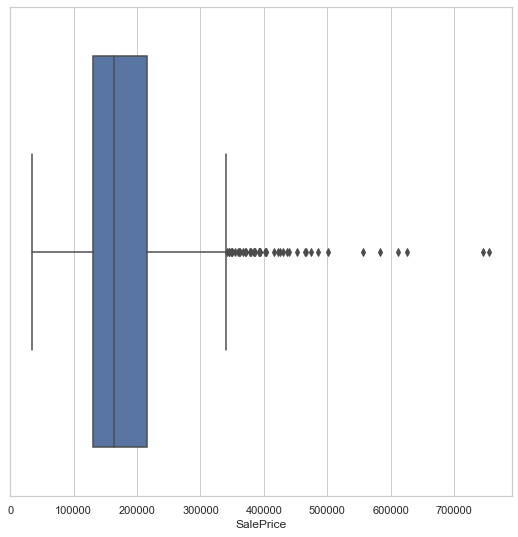

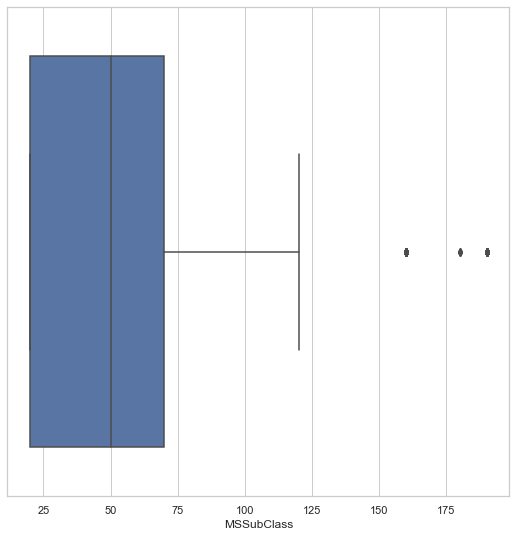

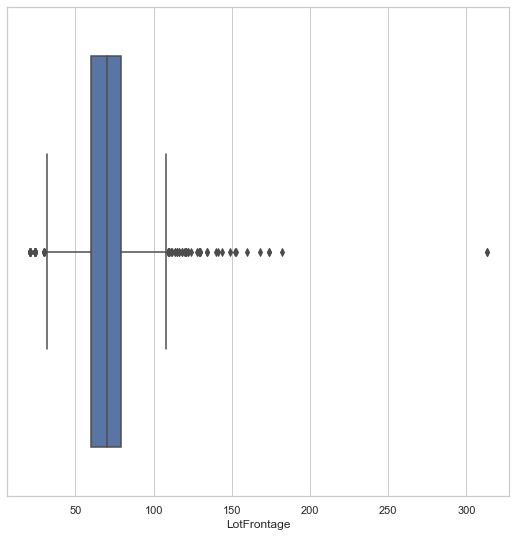

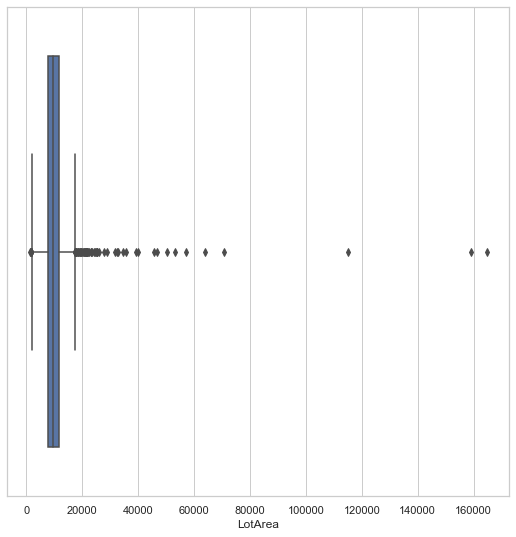

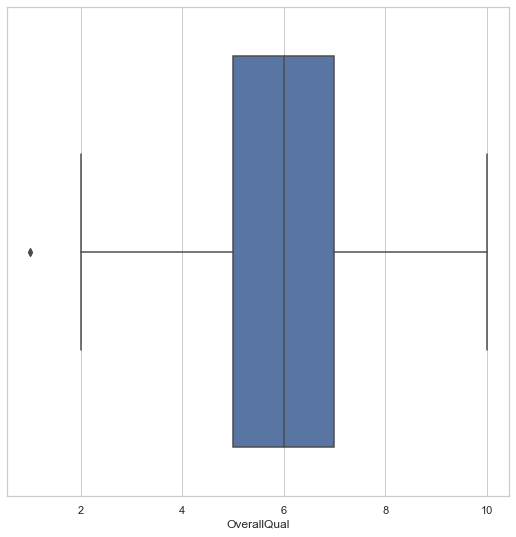

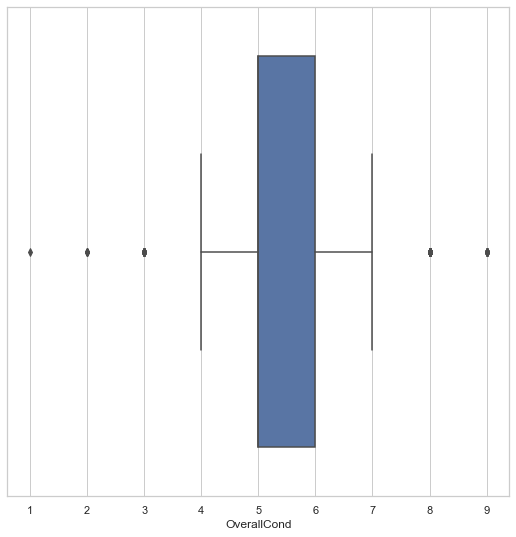

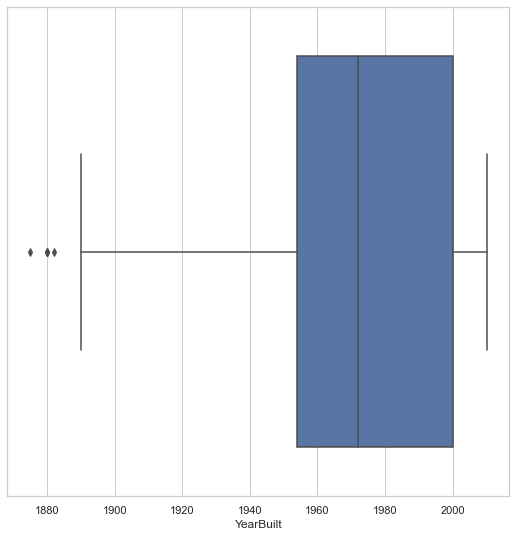

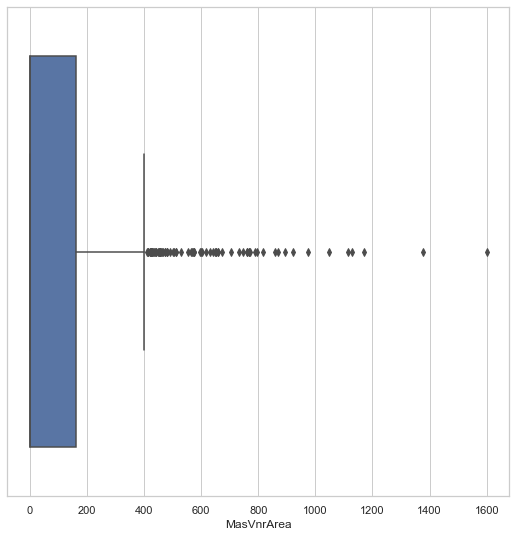

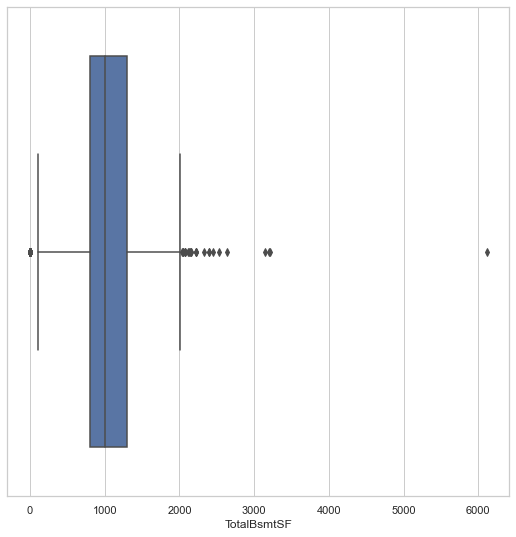

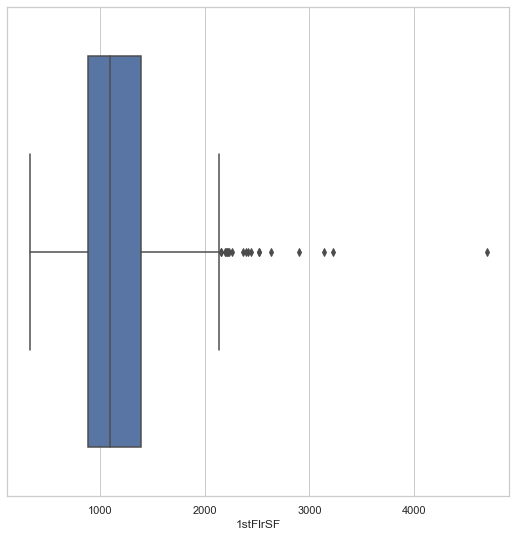

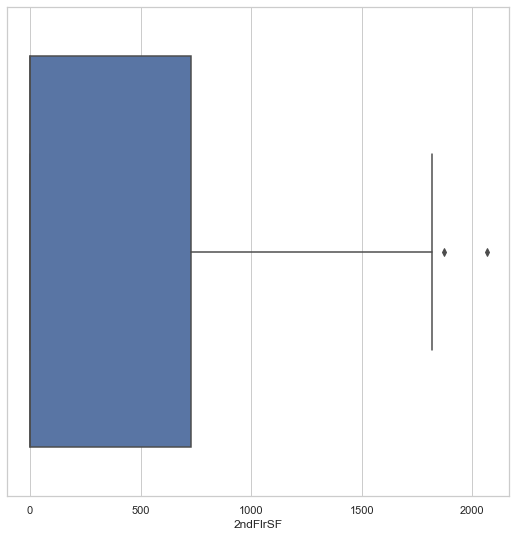

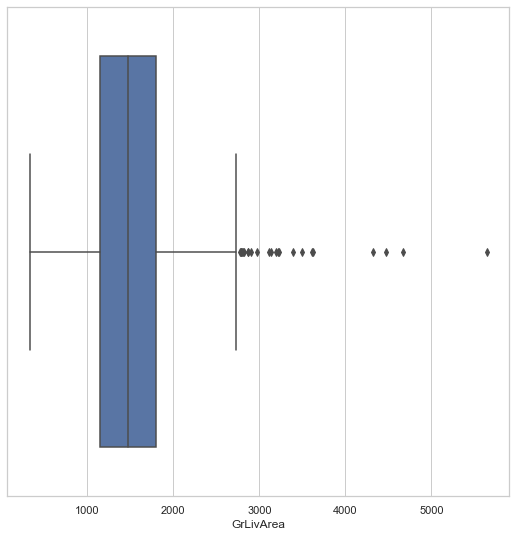

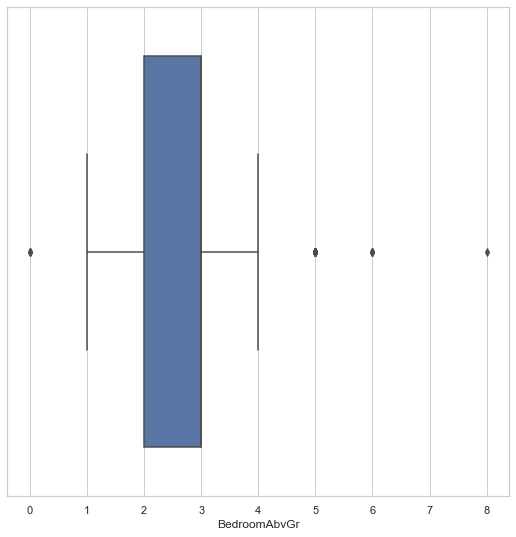

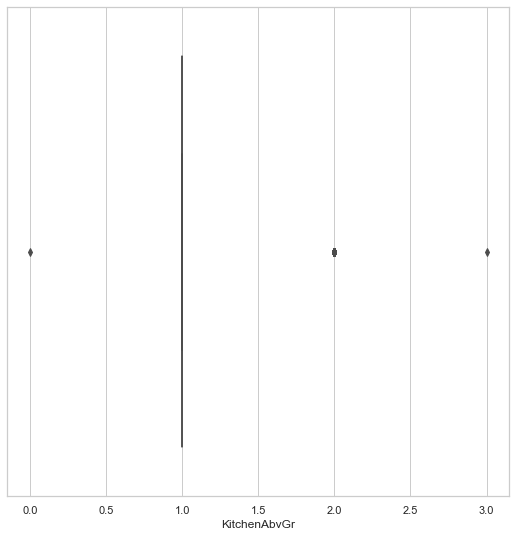

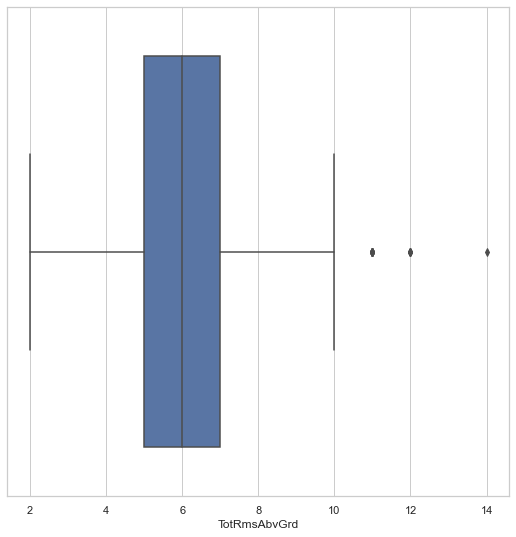

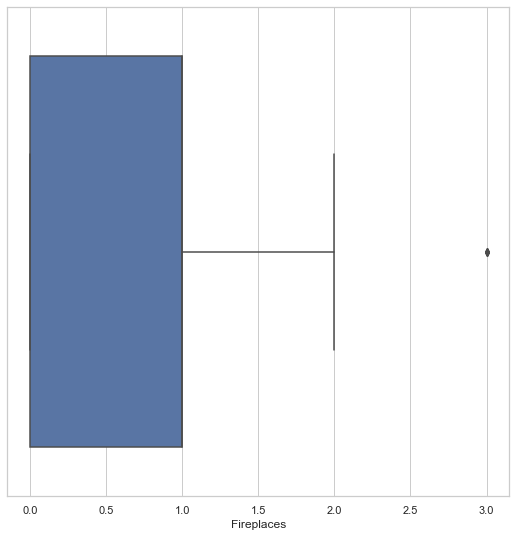

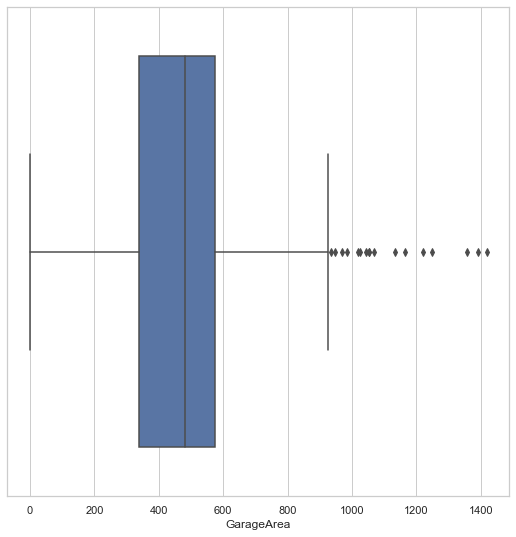

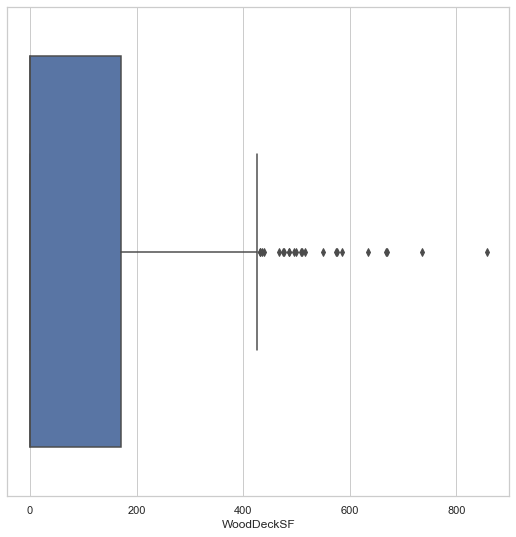

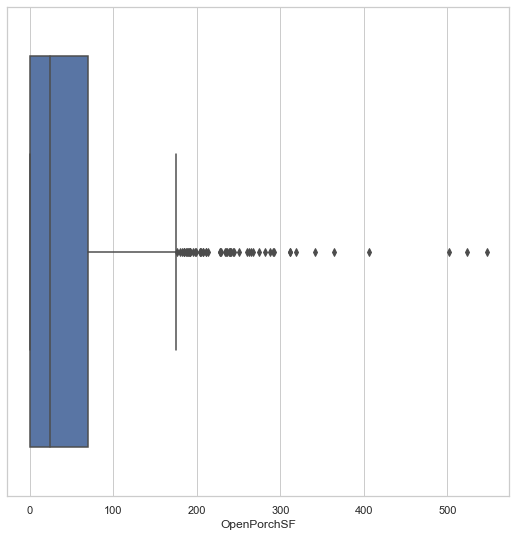

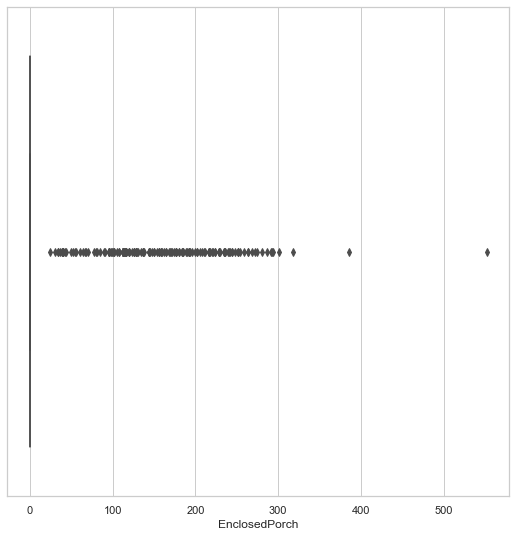

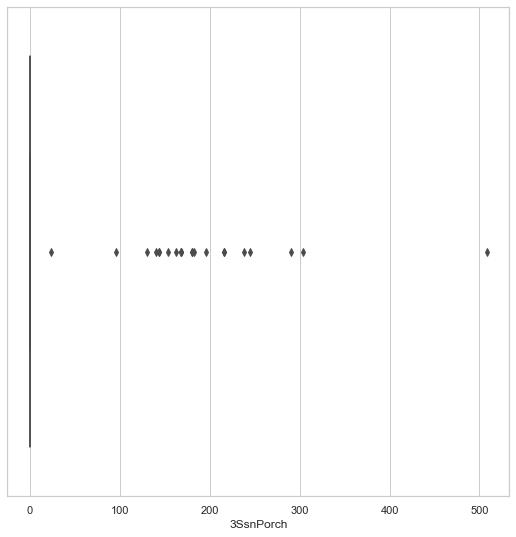

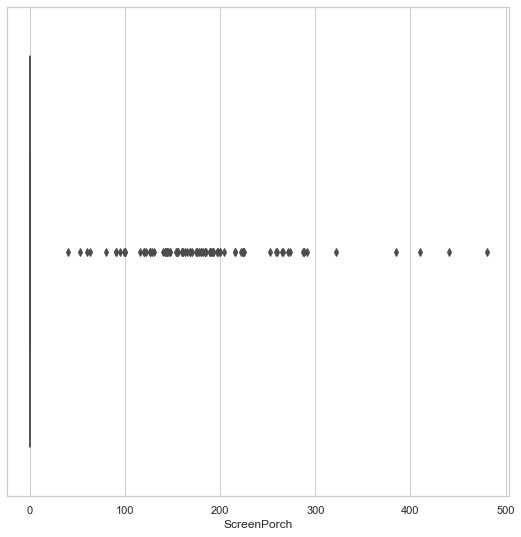

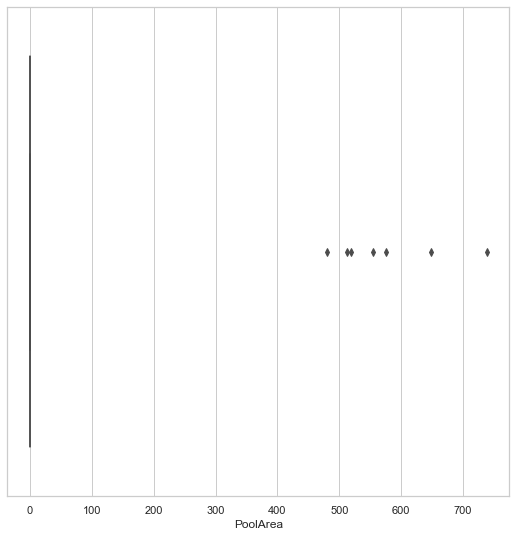

In [173]:
out_col=['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
sns.set_theme(style="whitegrid")
for i in out_col:
    sns.boxplot(x=df_train[i])
    plt.show()

In [174]:
#Defining a function which return the list of indices where outliers are present.
def outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=dataframe.index[(dataframe[feature]<lower_bound) | (dataframe[feature]>upper_bound)]
    return ls

In [175]:
#Create an empty list to store the output indices from the multiple columns.

index_list=[]
for feature in ['SalePrice','LotFrontage','LotArea','MasVnrArea','GarageArea','GrLivArea']:
    index_list.extend(outliers(df_train,feature))

In [176]:
#Showing the index of those rows which have outliers.
index_list

[27,
 65,
 78,
 103,
 119,
 141,
 191,
 193,
 232,
 241,
 245,
 259,
 300,
 305,
 352,
 369,
 383,
 394,
 423,
 452,
 504,
 523,
 561,
 574,
 622,
 691,
 722,
 743,
 757,
 762,
 783,
 791,
 839,
 858,
 863,
 897,
 910,
 914,
 985,
 993,
 1003,
 1013,
 1032,
 1064,
 1150,
 12,
 19,
 35,
 40,
 42,
 43,
 59,
 132,
 141,
 157,
 174,
 176,
 191,
 195,
 200,
 231,
 247,
 276,
 284,
 297,
 303,
 307,
 315,
 347,
 361,
 409,
 420,
 459,
 467,
 531,
 537,
 558,
 592,
 604,
 624,
 626,
 642,
 656,
 679,
 698,
 706,
 724,
 741,
 747,
 751,
 758,
 760,
 774,
 800,
 822,
 831,
 832,
 839,
 842,
 852,
 864,
 865,
 872,
 887,
 890,
 896,
 897,
 902,
 907,
 911,
 915,
 922,
 923,
 979,
 985,
 1005,
 1032,
 1046,
 1053,
 1055,
 1081,
 1094,
 1105,
 1120,
 1127,
 1147,
 1165,
 25,
 26,
 32,
 40,
 56,
 68,
 103,
 113,
 119,
 192,
 206,
 211,
 231,
 245,
 251,
 267,
 284,
 290,
 310,
 356,
 361,
 440,
 441,
 488,
 489,
 500,
 507,
 528,
 533,
 537,
 558,
 561,
 570,
 592,
 600,
 626,
 639,
 642,
 649,
 65

In [177]:
len(index_list)

315

In [178]:
df_train

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        128000         120         70.0     4928            6            5   
1        268000          20         95.0    15865            8            6   
2        269790          60         92.0     9920            7            5   
3        190000          20        105.0    11751            6            6   
4        215000          20         70.0    16635            6            7   
...         ...         ...          ...      ...          ...          ...   
1163     122000          20         70.0     9819            5            5   
1164     108000          20         67.0     8777            4            5   
1165     148500         160         24.0     2280            6            6   
1166      40000          70         50.0     8500            4            4   
1167     183200          60         70.0     7861            6            5   

      YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1996         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          1977       126.0        1246           0        356         1602   
...         ...         ...         ...         ...        ...          ...   
1163       1967        31.0         450           0        432          882   
1164       1949         0.0           0           0          0            0   
1165       1976         0.0         566           0        289          855   
1166       1920         0.0           0           0        649          649   
1167       2002         0.0         457           0        326          783   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          958         0             0        958             0             0   
1         2217         0             0       2217             1             0   
2         1127       886             0       2013             1             0   
3         1844         0             0       1844             0             0   
4         1602         0             0       1602             0             1   
...        ...       ...           ...        ...           ...           ...   
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0            2         0             2             1             5   
1            2         0             4             1             8   
2            2         1             3             1             8   
3            2         0             3             1             7   
4            2         0             3             1             8   
...        ...       ...           ...           ...           ...   
1163         1         0             3             1             5   
1164         2         0             2             1             5   
1165         2         1             3             1             7   
1166         1         0             3             1             6   
1167         2         1             3             1             7   

      Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0              1       1977.0         440           0          205   
1              1       1970.0         621          81          207   
2              1       1997.0         455         180          130   
3             

In [179]:
#Getting the min value from the column "YearBuilt" of training dataset.
min(df_train["YearBuilt"].unique())

1875

In [180]:
#Getting the max value from the column "YearBuilt" of training dataset.
max(df_train["YearBuilt"].unique())

2010

In [181]:
#Getting the min value from the column "YearBuilt" of test dataset.
min(df_test["YearBuilt"].unique())

1872

In [182]:
#Getting the max value from the column "YearBuilt" of test dataset.
max(df_test["YearBuilt"].unique())

2009

In [183]:
#We are changing the values of the column "YearBuilt" depending upon the conditions with  values "A","B" & "C" :-
  # 1870<= Year <1925------>  "A"
  # 1925<= Year <1975------>  "B"
  # 1975<= Year <2025------>  "C"



#For the training dataset.
for i in df_train.index:
    if 1870<= df_train.loc[i,"YearBuilt"]<1925:
        df_train.loc[i,"YearBuilt"]="A"
    elif 1925<= df_train.loc[i,"YearBuilt"]<1975:
        df_train.loc[i,"YearBuilt"]="B"
    elif 1975<= df_train.loc[i,"YearBuilt"]<2025:
         df_train.loc[i,"YearBuilt"]="C"
        
        
#For the test dataset.        
for i in df_test.index:
    if 1870<= df_test.loc[i,"YearBuilt"]<1925:
        df_test.loc[i,"YearBuilt"]="A"
    elif 1925<= df_test.loc[i,"YearBuilt"]<1975:
        df_test.loc[i,"YearBuilt"]="B"
    elif 1975<= df_test.loc[i,"YearBuilt"]<2025:
         df_test.loc[i,"YearBuilt"]="C"
                
        
    
    

In [184]:
df_train

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        128000         120         70.0     4928            6            5   
1        268000          20         95.0    15865            8            6   
2        269790          60         92.0     9920            7            5   
3        190000          20        105.0    11751            6            6   
4        215000          20         70.0    16635            6            7   
...         ...         ...          ...      ...          ...          ...   
1163     122000          20         70.0     9819            5            5   
1164     108000          20         67.0     8777            4            5   
1165     148500         160         24.0     2280            6            6   
1166      40000          70         50.0     8500            4            4   
1167     183200          60         70.0     7861            6            5   

     YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            C         0.0         120           0        958         1078   
1            B         0.0         351         823       1043         2217   
2            C         0.0         862           0        255         1117   
3            C       480.0         705           0       1139         1844   
4            C       126.0        1246           0        356         1602   
...        ...         ...         ...         ...        ...          ...   
1163         B        31.0         450           0        432          882   
1164         B         0.0           0           0          0            0   
1165         C         0.0         566           0        289          855   
1166         A         0.0           0           0        649          649   
1167         C         0.0         457           0        326          783   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          958         0             0        958             0             0   
1         2217         0             0       2217             1             0   
2         1127       886             0       2013             1             0   
3         1844         0             0       1844             0             0   
4         1602         0             0       1602             0             1   
...        ...       ...           ...        ...           ...           ...   
1163       900         0             0        900             0             0   
1164      1126         0             0       1126             0             0   
1165       855       601             0       1456             0             0   
1166       649       668             0       1317             0             0   
1167       807       702             0       1509             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0            2         0             2             1             5   
1            2         0             4             1             8   
2            2         1             3             1             8   
3            2         0             3             1             7   
4            2         0             3             1             8   
...        ...       ...           ...           ...           ...   
1163         1         0             3             1             5   
1164         2         0             2             1             5   
1165         2         1             3             1             7   
1166         1         0             3             1             6   
1167         2         1             3             1             7   

      Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0              1       1977.0         440           0          205   
1              1       1970.0         621          81          207   
2              1       1997.0         455         180          130   
3              1       197

In [185]:
df_train["YearBuilt"].value_counts()

C    557
B    490
A    121
Name: YearBuilt, dtype: int64

In [186]:

df_train["GarageYrBlt"].value_counts()


2006.0    116
2005.0     51
2007.0     40
2003.0     37
2004.0     36
         ... 
1908.0      1
1900.0      1
1906.0      1
1927.0      1
1933.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [187]:
df_train["GarageYrBlt"].value_counts()

2006.0    116
2005.0     51
2007.0     40
2003.0     37
2004.0     36
         ... 
1908.0      1
1900.0      1
1906.0      1
1927.0      1
1933.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [188]:
min(df_train["GarageYrBlt"].unique())

1900.0

In [189]:
max(df_train["GarageYrBlt"].unique())

2010.0

In [190]:
#We are changing the values of the column "GarageYrBlt" depending upon the conditions with  values "Garage_A","Garage_B" & "Garage_C" :-
  # 1875<= GarageYearBlt <1925------>  "Garage_A"
  # 1925<= GarageYearBlt <1975------>  "Garage_B"
  # 1975<= GarageYearBlt <2025------>  "Garage_C"
for i in df_train.index:
    if 1875<= df_train.loc[i,"GarageYrBlt"]<1925:
        df_train.loc[i,"GarageYrBlt"]="Garage_A"
    elif 1925<= df_train.loc[i,"GarageYrBlt"]<1975:
        df_train.loc[i,"GarageYrBlt"]="Garage_B"
    elif 1975<= df_train.loc[i,"GarageYrBlt"]<2025:
         df_train.loc[i,"GarageYrBlt"]="Garage_C"
        
        
        
for i in df_test.index:
    if 1875<= df_test.loc[i,"GarageYrBlt"]<1925:
        df_test.loc[i,"GarageYrBlt"]="Garage_A"
    elif 1925<= df_test.loc[i,"GarageYrBlt"]<1975:
        df_test.loc[i,"GarageYrBlt"]="Garage_B"
    elif 1975<= df_test.loc[i,"GarageYrBlt"]<2025:
         df_test.loc[i,"GarageYrBlt"]="Garage_C"
                

In [191]:
#We are now creating dummy variables for the two columns and deleting one of the dummy variable column to cope up with dummy variable trap.
year=["YearBuilt","GarageYrBlt"]
df_train=pd.get_dummies(data=df_train,columns=year,drop_first=True)
df_train
df_test=pd.get_dummies(data=df_test,columns=year,drop_first=True)
df_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            20         86.0    14157            9            5       200.0   
1           120         65.0     5814            8            5         0.0   
2            20         65.0    11838            8            5         0.0   
3            70         75.0    12000            7            7         0.0   
4            60         86.0    14598            6            5        74.0   
..          ...          ...      ...          ...          ...         ...   
287          20         78.0    10206            8            5       468.0   
288          20         57.0     9245            5            5         0.0   
289          20         65.0    11241            6            7       180.0   
290          50         50.0     5000            6            7         0.0   
291         160         21.0     1953            6            5       408.0   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          1249           0        673         1922      1922         0   
1          1036           0        184         1220      1360         0   
2             0           0       1753         1753      1788         0   
3           275           0        429          704       860       704   
4             0           0        894          894       894      1039   
..          ...         ...        ...          ...       ...       ...   
287          33           0       1530         1563      1563         0   
288         686           0        304          990       990         0   
289         578           0        426         1004      1004         0   
290         399           0        605         1004      1004       660   
291         309           0        174          483       483       504   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0               0       1922             1             0         2         0   
1               0       1360             1             0         1         0   
2               0       1788             0             0         2         0   
3               0       1564             0             0         1         1   
4               0       1933             0             0         2         1   
..            ...        ...           ...           ...       ...       ...   
287             0       1563             0             0         2         0   
288             0        990             0             1         1         0   
289             0       1004             1             0         1         0   
290             0       1664             0             0         2         0   
291             0        987             0             0         1         1   

     BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  \
0               3             1             8           1         676   
1               1             1             4           1         565   
2               3             1             7           1         522   
3               3             1             7           1         234   
4               4             1             9           1         668   
..            ...           ...           ...         ...         ...   
287             3             1             6           1         758   
288             3             1             5           0         672   
289             2             1             5           1         480   
290             3             1             7           2         420   
291             2             1             5           0         264   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           178           51              0          0            0         0   
1            63            0              0          0            0         0   
2           202          151              0          0            0       

In [192]:
df_train.shape

(1168, 183)

In [193]:
df_test.shape

(292, 182)

In [194]:
#Create list which have all the columns of training dataset.
tr_col=[]
for i in df_train.columns:
    tr_col.append(i)

In [195]:
#Create list which have all the columns of test dataset.
te_col=[]
for i in df_test.columns:
    te_col.append(i)

In [196]:
len(tr_col)

183

In [197]:
len(te_col)

182

In [198]:
tr_col

['SalePrice',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 

In [199]:
#Creating a new sequence of the features in training dataset for our convenience.
df_train=df_train[['SalePrice',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_ConLD',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD',
 'YearBuilt_B',
 'YearBuilt_C',
 'GarageYrBlt_Garage_B',
 'GarageYrBlt_Garage_C']]

In [200]:
#Creating a new sequence of the features in test dataset for our convenience.
df_test=df_test[['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_ConLD',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD',
 'YearBuilt_B',
 'YearBuilt_C',
 'GarageYrBlt_Garage_B',
 'GarageYrBlt_Garage_C']]

In [201]:
df_train

SalePrice  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        128000         120         70.0     4928            6            5   
1        268000          20         95.0    15865            8            6   
2        269790          60         92.0     9920            7            5   
3        190000          20        105.0    11751            6            6   
4        215000          20         70.0    16635            6            7   
...         ...         ...          ...      ...          ...          ...   
1163     122000          20         70.0     9819            5            5   
1164     108000          20         67.0     8777            4            5   
1165     148500         160         24.0     2280            6            6   
1166      40000          70         50.0     8500            4            4   
1167     183200          60         70.0     7861            6            5   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0            0.0         120           0        958         1078       958   
1            0.0         351         823       1043         2217      2217   
2            0.0         862           0        255         1117      1127   
3          480.0         705           0       1139         1844      1844   
4          126.0        1246           0        356         1602      1602   
...          ...         ...         ...        ...          ...       ...   
1163        31.0         450           0        432          882       900   
1164         0.0           0           0          0            0      1126   
1165         0.0         566           0        289          855       855   
1166         0.0           0           0        649          649       649   
1167         0.0         457           0        326          783       807   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0            0             0        958             0             0         2   
1            0             0       2217             1             0         2   
2          886             0       2013             1             0         2   
3            0             0       1844             0             0         2   
4            0             0       1602             0             1         2   
...        ...           ...        ...           ...           ...       ...   
1163         0             0        900             0             0         1   
1164         0             0       1126             0             0         2   
1165       601             0       1456             0             0         2   
1166       668             0       1317             0             0         1   
1167       702             0       1509             1             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            0             2             1             5           1   
1            0             4             1             8           1   
2            1             3             1             8           1   
3            0             3             1             7           1   
4            0             3             1             8           1   
...        ...           ...           ...           ...         ...   
1163         0             3             1             5           0   
1164         0             2             1             5           0   
1165         1             3             1             7           1   
1166         0             3             1             6           0   
1167         1             3             1             7           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            440           0          205              0          0   
1            621          81          207              0          0   
2            455         180          130              0          0  

In [202]:
#Bifurcating the training dataset into dependent and independent variables.
x=df_train.iloc[:,1:]
y=df_train.iloc[:,0]

In [203]:
x

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0            120         70.0     4928            6            5         0.0   
1             20         95.0    15865            8            6         0.0   
2             60         92.0     9920            7            5         0.0   
3             20        105.0    11751            6            6       480.0   
4             20         70.0    16635            6            7       126.0   
...          ...          ...      ...          ...          ...         ...   
1163          20         70.0     9819            5            5        31.0   
1164          20         67.0     8777            4            5         0.0   
1165         160         24.0     2280            6            6         0.0   
1166          70         50.0     8500            4            4         0.0   
1167          60         70.0     7861            6            5         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0            120           0        958         1078       958         0   
1            351         823       1043         2217      2217         0   
2            862           0        255         1117      1127       886   
3            705           0       1139         1844      1844         0   
4           1246           0        356         1602      1602         0   
...          ...         ...        ...          ...       ...       ...   
1163         450           0        432          882       900         0   
1164           0           0          0            0      1126         0   
1165         566           0        289          855       855       601   
1166           0           0        649          649       649       668   
1167         457           0        326          783       807       702   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0        958             0             0         2         0   
1                0       2217             1             0         2         0   
2                0       2013             1             0         2         1   
3                0       1844             0             0         2         0   
4                0       1602             0             1         2         0   
...            ...        ...           ...           ...       ...       ...   
1163             0        900             0             0         1         0   
1164             0       1126             0             0         2         0   
1165             0       1456             0             0         2         1   
1166             0       1317             0             0         1         0   
1167             0       1509             1             0         2         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  \
0                2             1             5           1         440   
1                4             1             8           1         621   
2                3             1             8           1         455   
3                3             1             7           1         546   
4                3             1             8           1         529   
...            ...           ...           ...         ...         ...   
1163             3             1             5           0         280   
1164             2             1             5           0         520   
1165             3             1             7           1         440   
1166             3             1             6           0         250   
1167             3             1             7           1         393   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0          205              0          0            0   
1             81          207              0          0          224   
2            180          130              0          

In [204]:
#Standard Scaling the data.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns = x.columns)
df_test = pd.DataFrame(sc.transform(df_test),columns = df_test.columns)

In [205]:
#Performing train test split on the dataset for model training.passing 20 % of data for model testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [206]:
#converting the independent variable y to numpy array .
y_train=y_train.to_numpy()
y_train=y_train.reshape(-1,1)

y_test=y_test.to_numpy()
y_test=y_test.reshape(-1,1)

In [207]:
#Importing different regression metrics and machine learning algorithms.
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [208]:
n=1168
k=182

In [209]:
#DecisionTreeRegressor model
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print("R2_score of DecisionTreeRegressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of DecisionTreeRegressor model is : ",Adj_r2)
print("Mean_squared_error of DecisionTreeRegressor model is : ",mean_squared_error(y_test,y_pred))

R2_score of DecisionTreeRegressor model is : 0.7197465674680911
Adjusted_r2_score of DecisionTreeRegressor model is :  0.6679636997312307
Mean_squared_error of DecisionTreeRegressor model is :  1824560965.9188035


In [210]:
#knearest Neighbours regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)
print("R2_score  OF KNN regressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of KNN regressor model is : ",Adj_r2)
print("Mean_squared_error of KNN regressor model is : ",mean_squared_error(y_test,y_pred))

R2_score  OF KNN regressor model is : 0.6922091431388678
Adjusted_r2_score of KNN regressor model is :  0.6353381421756942
Mean_squared_error of KNN regressor model is :  2003840516.85641


In [211]:
#AdaBoost Regressor model
abr=AdaBoostRegressor()

abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)
print("R2_score of AdaBoost Regressor model  is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of AdaBoost Regressor model is : ",Adj_r2)
print("Mean_squared_error of AdaBoost Regressor model is : ",mean_squared_error(y_test,y_pred))

R2_score of AdaBoost Regressor model  is : 0.7359834002609802
Adjusted_r2_score of AdaBoost Regressor model is :  0.687200637669608
Mean_squared_error of AdaBoost Regressor model is :  1718852746.5531664


In [212]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("R2_score  of LinearRegressor model is :", r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score  of LinearRegressor model is : ",Adj_r2)
print("Mean_squared_error of LinearRegressor model : ",mean_squared_error(y_test,y_pred))

R2_score  of LinearRegressor model is : -5.479463540787324e+17
Adjusted_r2_score  of LinearRegressor model is :  -6.491912641724677e+17
Mean_squared_error of LinearRegressor model :  3.567348025097778e+27


In [213]:
#Gradient boosting model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2_score  of GradientBoosting Regressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of GradientBoosting Regressor model is : ",Adj_r2)
print("Mean_squared_error of GradientBoosting Regressor model is : ",mean_squared_error(y_test,y_pred))

R2_score  of GradientBoosting Regressor model is : 0.8748093573156407
Adjusted_r2_score of GradientBoosting Regressor model is :  0.8516776852663479
Mean_squared_error of GradientBoosting Regressor model is :  815040721.808691


In [214]:
#Support vector Regressor model
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
print("R2_score of Support Vector Regressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score  of Support Vector Regressor model is : ",Adj_r2)
print("Mean_squared_error of Support Vector Regressor model is : ",mean_squared_error(y_test,y_pred))

R2_score of Support Vector Regressor model is : -0.05562134505689964
Adjusted_r2_score  of Support Vector Regressor model is :  -0.25067016211309845
Mean_squared_error of Support Vector Regressor model is :  6872513508.865689


In [215]:
#RandomForest Regressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print("R2_score of RandomForestRegressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of RandomForestRegressor model is : ",Adj_r2)
print("Mean_squared_error of RandomForestRegressor model is: ",mean_squared_error(y_test,y_pred))

R2_score of RandomForestRegressor model is : 0.8189416963914834
Adjusted_r2_score of RandomForestRegressor model is :  0.7854872687196559
Mean_squared_error of RandomForestRegressor model is:  1178761345.8827558


In [216]:
#To check model overfitting we are performing the cross validation.
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=6)
print("Cross validation score of LinearRegression model :",scr.mean())
scr=cross_val_score(gbr,x,y,cv=6)
print("Cross validation score of gradientBoostingRegression model :",scr.mean())
scr=cross_val_score(svr,x,y,cv=6)
print("Cross validation score of Support vector regression model :",scr.mean())
scr=cross_val_score(abr,x,y,cv=6)
print("Cross validation score of AdaBoostRegressor model :",scr.mean())
scr=cross_val_score(knr,x,y,cv=6)
print("Cross validation score of Knearest neighbour regressor model :",scr.mean())
scr=cross_val_score(dtr,x,y,cv=6)
print("Cross validation score of DecisionTreeRegressor model :",scr.mean())
scr=cross_val_score(rfr,x,y,cv=6)
print("Cross validation score of RandomForestRegressor model :",scr.mean())

Cross validation score of LinearRegression model : -3.507560571660704e+21
Cross validation score of gradientBoostingRegression model : 0.8760363223809456
Cross validation score of Support vector regression model : -0.055716043214692736
Cross validation score of AdaBoostRegressor model : 0.8002358320275951
Cross validation score of Knearest neighbour regressor model : 0.6889698499820712
Cross validation score of DecisionTreeRegressor model : 0.749714514335313
Cross validation score of RandomForestRegressor model : 0.8511670006132802


Our best performing model is Gradient Boosting Regressor

In [217]:
#Importing Ridge and Lasso regression models.
from sklearn.linear_model import Ridge,Lasso

In [218]:
#Ridge Regressor model
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
print("R2_score of RidgeRegressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of RidgeRegressor model  is : ",Adj_r2)
print("Mean_squared_error of RidgeRegressor model is : ",mean_squared_error(y_test,y_pred))

R2_score of RidgeRegressor model is : 0.6533105651742508
Adjusted_r2_score of RidgeRegressor model  is :  0.5892522127495946
Mean_squared_error of RidgeRegressor model is :  2257085682.643661


In [219]:
#Lasso Regressor model
la=Lasso(alpha=0.001)
la.fit(x_train,y_train)
y_pred=la.predict(x_test)
print("R2_score  of LassoRegressor model is :",r2_score(y_test,y_pred))
Adj_r2 = 1-(1-r2_score(y_test,y_pred))*(n-1)/(n-k-1)
print("Adjusted_r2_score of LassoRegressor model is : ",Adj_r2)
print("Mean_squared_error of LassoRegressor model is: ",mean_squared_error(y_test,y_pred))

R2_score  of LassoRegressor model is : 0.6533049592576221
Adjusted_r2_score of LassoRegressor model is :  0.5892455710189289
Mean_squared_error of LassoRegressor model is:  2257122179.3836536


In [220]:
#Doing cross validation to check the overfitting of the model.
scr=cross_val_score(ridge,x,y,cv=6)
print("Cross validation score of RidgeRegression model :",scr.mean())
scr=cross_val_score(la,x,y,cv=6)
print("Cross validation score of LassoRegression model :",scr.mean())

Cross validation score of RidgeRegression model : 0.8032162581721294
Cross validation score of LassoRegression model : 0.8032141900758617


Our Best performing model is GradientBoostingRegressor.

# Lets DO the hyperparameter tuning of this GradientBoostingRegressor Model.

In [272]:
#Importing grid search cv
from sklearn.model_selection import GridSearchCV
parameter={ "loss":[ 'ls', 'absolute_error'],"criterion":['friedman_mse' 'mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
GCV=GridSearchCV(GradientBoostingRegressor(),parameter,cv=7)
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_msemse', 'mae'],
                         'loss': ['ls', 'absolute_error'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [273]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'mae', 'loss': 'ls', 'max_features': 'sqrt'}

In [274]:
#Predicting the saleprice with the help of x_test.
GCV_pred=GCV.best_estimator_.predict(x_test)

In [275]:
#Calculating the r2_score
r2_score(y_test,GCV_pred)


0.884949835280371

In [276]:
#Calculating the adjusted r2_score.
Adj_r2 = 1-(1-r2_score(y_test,GCV_pred))*(n-1)/(n-k-1)
print("adjusted_r2_score is : ",Adj_r2)


adjusted_r2_score is :  0.8636918353017187


Great!! We can see that after hyperparameter tuning of the gradient boosting model our adjusted r2 score increased from 0.8516 to 0.8636 that is increment of 1.2%.

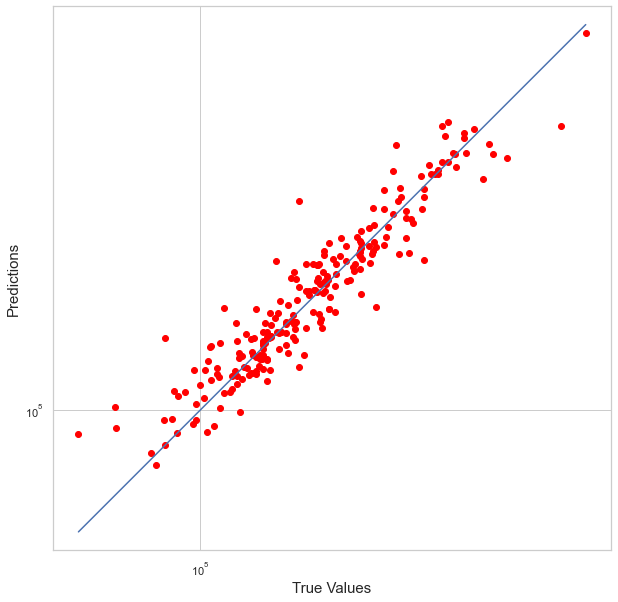

In [277]:
#Visualising the result between the predicted SalePrice & actual SalePrice.
plt.figure(figsize=(10,10))
plt.scatter(y_test, GCV_pred, c='red')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(GCV_pred), max(y_test))
p2 = min(min(GCV_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [278]:
#Getting the sales prices for all the rows of test dataset.
submission_results=GCV.best_estimator_.predict(df_test)

In [279]:
#Converting it into a dataframe.
df_sub = pd.DataFrame(data =submission_results,columns=["SalePrice"])

In [280]:
df_sub

SalePrice
0    373946.833729
1    197106.644090
2    251479.413252
3    160023.294481
4    226069.605336
..             ...
287  251080.642586
288  141418.242129
289  145097.791888
290  142851.230800
291   99085.304171

[292 rows x 1 columns]

In [ ]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"pfahousingproject.pkl")